In [1]:
import os
import json
import pandas as pd

# Folder path where all JSON files are located
folder_path = r'/Users/sanjanachippada/Desktop/Sem 2/Machine learning/Project/odis_male_json'


In [2]:
# List to store all match data
matches_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):  # Process only JSON files
        file_path = os.path.join(folder_path, filename)
        
        # Use the filename (without extension) as the match_id
        match_id = os.path.splitext(filename)[0]
        
        # Load each JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)

        outcome_by = data['info']['outcome'].get('by', {})
        result_margin = outcome_by.get('runs') if 'runs' in outcome_by else outcome_by.get('wickets')
        result_margin_type = 'runs' if 'runs' in outcome_by else 'wickets' if 'wickets' in outcome_by else None

        umpires = data['info'].get('officials', {}).get('umpires', [])
        umpire1 = umpires[0] if len(umpires) > 0 else None
        umpire2 = umpires[1] if len(umpires) > 1 else None

        sorted_teams = sorted(data['info']['teams'])
        team1 = sorted_teams[0]
        team2 = sorted_teams[1]



In [3]:
# List to store all match data
matches_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):  # Process only JSON files
        file_path = os.path.join(folder_path, filename)
        
        # Use the filename (without extension) as the match_id
        match_id = os.path.splitext(filename)[0]
        
        # Load each JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)

        outcome_by = data['info']['outcome'].get('by', {})
        result_margin = outcome_by.get('runs') if 'runs' in outcome_by else outcome_by.get('wickets')
        result_margin_type = 'runs' if 'runs' in outcome_by else 'wickets' if 'wickets' in outcome_by else None

        umpires = data['info'].get('officials', {}).get('umpires', [])
        umpire1 = umpires[0] if len(umpires) > 0 else None
        umpire2 = umpires[1] if len(umpires) > 1 else None

        sorted_teams = sorted(data['info']['teams'])
        team1 = sorted_teams[0]
        team2 = sorted_teams[1]

        match_info = {
            'match_id': match_id,
            'city': data['info'].get('city', None),
            'date': data['info'].get('dates', [None])[0],  # Use the first date in the list
            'player_of_match': data['info'].get('player_of_match', [None])[0],  # First player of match
            'venue': data['info'].get('venue', None),
            'match_type' : data['info'].get('match_type',None),
            'team1': team1,
            'team2': team2,
            'toss_winner': data['info']['toss'].get('winner', None),
            'toss_decision': data['info']['toss'].get('decision', None),
            'winner': data['info']['outcome'].get('winner', None),
            'result': 'win' if 'winner' in data['info']['outcome'] else 'draw',
            'outcome_by' : data['info']['outcome'].get('by', {}),
            'result_margin': result_margin,
            'result_margin_type': result_margin_type,
            'umpire1': umpire1,
            'umpire2': umpire2,
            'season': data['info'].get('season', None), 
            'team_type': data['info'].get('team_type', None),
            'team1_players':data['info']['players'][team1],
            'team2_players':data['info']['players'][team2]
        }
        
        matches_data.append(match_info)

# Create a DataFrame with all match-level data
df_matches = pd.DataFrame(matches_data)


In [4]:
df_matches.head()

match_id      city        date player_of_match  \
0  1387601  Gqeberha  2023-12-19      T de Zorzi   
1   467883  Guwahati  2010-11-28         V Kohli   
2   351689     Perth  2009-02-01        KD Mills   
3  1312806  Pearland  2022-06-11       SR Taylor   
4  1377005   Sharjah  2023-06-04         BA King   

                                          venue match_type  \
0                    St George's Park, Gqeberha        ODI   
1                                 Nehru Stadium        ODI   
2  Western Australia Cricket Association Ground        ODI   
3               Moosa Cricket Stadium, Pearland        ODI   
4                       Sharjah Cricket Stadium        ODI   

                  team1                     team2           toss_winner  \
0                 India              South Africa          South Africa   
1                 India               New Zealand           New Zealand   
2             Australia               New Zealand             Australia   
3                 Nepal  United States of America                 Nepal   
4  United Arab Emirates               West Indies  United Arab Emirates   

  toss_decision  ... result      outcome_by result_margin  result_margin_type  \
0         field  ...    win  {'wickets': 8}           8.0             wickets   
1         field  ...    win    {'runs': 40}          40.0                runs   
2           bat  ...    win  {'wickets': 2}           2.0             wickets   
3           bat  ...   draw              {}           NaN                None   
4           bat  ...    win  {'wickets': 7}           7.0             wickets   

       umpire1         umpire2   season      team_type  \
0   Ahsan Raza         BP Jele  2023/24  international   
1     NJ Llong     SK Tarapore  2010/11  international   
2   SA Bucknor    BNJ Oxenford  2008/09  international   
3    LS Reifer  Vijaya Mallela     2022  international   
4  Aasif Iqbal      Ahsan Raza     2023  international   

                                       team1_players  \
0  [RD Gaikwad, B Sai Sudharsan, Tilak Varma, KL ...   
1  [M Vijay, G Gambhir, V Kohli, Yuvraj Singh, SK...   
2  [SE Marsh, DA Warner, RT Ponting, MJ Clarke, D...   
3  [K Bhurtel, Aasif Sheikh, D Khanal, RK Paudel,...   
4  [Waseem Muhammad, A Sharma, V Aravind, Rameez ...   

                                       team2_players  
0  [RR Hendricks, T de Zorzi, HE van der Dussen, ...  
1  [MJ Guptill, JM How, KS Williamson, LRPL Taylo...  
2  [BB McCullum, MJ Guptill, PG Fulton, LRPL Tayl...  
3  [SR Taylor, SJ Modani, MD Patel, Aaron Jones, ...  
4  [BA King, J Charles, SSJ Brooks, KU Carty, SD ...  

[5 rows x 21 columns]

In [5]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2389 entries, 0 to 2388
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   match_id            2389 non-null   object 
 1   city                2108 non-null   object 
 2   date                2389 non-null   object 
 3   player_of_match     2247 non-null   object 
 4   venue               2389 non-null   object 
 5   match_type          2389 non-null   object 
 6   team1               2389 non-null   object 
 7   team2               2389 non-null   object 
 8   toss_winner         2389 non-null   object 
 9   toss_decision       2389 non-null   object 
 10  winner              2266 non-null   object 
 11  result              2389 non-null   object 
 12  outcome_by          2389 non-null   object 
 13  result_margin       2266 non-null   float64
 14  result_margin_type  2266 non-null   object 
 15  umpire1             2389 non-null   object 
 16  umpire

In [6]:
df_matches.groupby('match_type')['match_type'].count()

match_type
ODI    2389
Name: match_type, dtype: int64

In [7]:
df_matches[df_matches['winner'].isna()]

match_id          city        date player_of_match  \
3     1312806      Pearland  2022-06-11       SR Taylor   
42      65660      Brisbane  2005-01-21            None   
84     868731        Lahore  2015-05-31            None   
86    1133017      Bulawayo  2018-03-12       SM Sharif   
137   1059712      Bulawayo  2016-11-19         SD Hope   
...       ...           ...         ...             ...   
2251   212020    Birmingham  2005-06-28            None   
2267  1157380          None  2018-11-11     LH Ferguson   
2279   602475    Hambantota  2013-03-25            None   
2306  1331365  Port Moresby  2022-09-11           S Bau   
2314    65272        Durban  2003-03-03     MS Atapattu   

                                                  venue match_type  \
3                       Moosa Cricket Stadium, Pearland        ODI   
42               Brisbane Cricket Ground, Woolloongabba        ODI   
84                                      Gaddafi Stadium        ODI   
86                                   Queens Sports Club        ODI   
137                                  Queens Sports Club        ODI   
...                                                 ...        ...   
2251                                          Edgbaston        ODI   
2267                Dubai International Cricket Stadium        ODI   
2279  Mahinda Rajapaksa International Cricket Stadiu...        ODI   
2306                           Amini Park, Port Moresby        ODI   
2314                                  Kingsmead, Durban        ODI   

                 team1                     team2       toss_winner  \
3                Nepal  United States of America             Nepal   
42           Australia               West Indies       West Indies   
84            Pakistan                  Zimbabwe          Pakistan   
86            Scotland                  Zimbabwe          Zimbabwe   
137        West Indies                  Zimbabwe          Zimbabwe   
...                ...                       ...               ...   
2251         Australia                   England         Australia   
2267       New Zealand                  Pakistan          Pakistan   
2279        Bangladesh                 Sri Lanka        Bangladesh   
2306  Papua New Guinea  United States of America  Papua New Guinea   
2314      South Africa                 Sri Lanka         Sri Lanka   

     toss_decision  ... result outcome_by result_margin  result_margin_type  \
3              bat  ...   draw         {}           NaN                None   
42             bat  ...   draw         {}           NaN                None   
84             bat  ...   draw         {}           NaN                None   
86             bat  ...   draw         {}           NaN                None   
137            bat  ...   draw         {}           NaN                None   
...            ...  ...    ...        ...           ...                 ...   
2251           bat  ...   draw         {}           NaN                None   
2267           bat  ...   draw         {}           NaN                None   
2279         field  ...   draw         {}           NaN                None   
2306         field  ...   draw         {}           NaN                None   
2314           bat  ...   draw         {}           NaN                None   

                umpire1         umpire2   season      team_type  \
3             LS Reifer  Vijaya Mallela     2022  international   
42            BF Bowden      SJA Taufel  2004/05  international   
84           Ahsan Raza       RB Tiffin     2015  international   
86             P Wilson   GO Brathwaite  2017/18  international   
137       C Shamshuddin       RB Tiffin  2016/17  international   
...                 ...             ...      ...            ...   
2251          BF Bowden     DR Shepherd     2005  international   
2267          JS Wilson     Shozab Raza  2018/19  international   
2279           NJ Llong  TH Wijewardene  2012/13  internationa

In [8]:
# First Drop the Unwanted Columns
df_matches.drop(['outcome_by'],axis=1,inplace=True)
df_matches = df_matches.dropna()

In [9]:
df_matches.head()

match_id      city        date player_of_match  \
0  1387601  Gqeberha  2023-12-19      T de Zorzi   
1   467883  Guwahati  2010-11-28         V Kohli   
2   351689     Perth  2009-02-01        KD Mills   
4  1377005   Sharjah  2023-06-04         BA King   
5   647251    Jaipur  2013-10-16       RG Sharma   

                                          venue match_type  \
0                    St George's Park, Gqeberha        ODI   
1                                 Nehru Stadium        ODI   
2  Western Australia Cricket Association Ground        ODI   
4                       Sharjah Cricket Stadium        ODI   
5                        Sawai Mansingh Stadium        ODI   

                  team1         team2           toss_winner toss_decision  \
0                 India  South Africa          South Africa         field   
1                 India   New Zealand           New Zealand         field   
2             Australia   New Zealand             Australia           bat   
4  United Arab Emirates   West Indies  United Arab Emirates           bat   
5             Australia         India             Australia           bat   

         winner result  result_margin result_margin_type           umpire1  \
0  South Africa    win            8.0            wickets        Ahsan Raza   
1         India    win           40.0               runs          NJ Llong   
2   New Zealand    win            2.0            wickets        SA Bucknor   
4   West Indies    win            7.0            wickets       Aasif Iqbal   
5         India    win            9.0            wickets  RA Kettleborough   

        umpire2   season      team_type  \
0       BP Jele  2023/24  international   
1   SK Tarapore  2010/11  international   
2  BNJ Oxenford  2008/09  international   
4    Ahsan Raza     2023  international   
5   VA Kulkarni  2013/14  international   

                                       team1_players  \
0  [RD Gaikwad, B Sai Sudharsan, Tilak Varma, KL ...   
1  [M Vijay, G Gambhir, V Kohli, Yuvraj Singh, SK...   
2  [SE Marsh, DA Warner, RT Ponting, MJ Clarke, D...   
4  [Waseem Muhammad, A Sharma, V Aravind, Rameez ...   
5  [AJ Finch, PJ Hughes, SR Watson, GJ Bailey, GJ...   

                                       team2_players  
0  [RR Hendricks, T de Zorzi, HE van der Dussen, ...  
1  [MJ Guptill, JM How, KS Williamson, LRPL Taylo...  
2  [BB McCullum, MJ Guptill, PG Fulton, LRPL Tayl...  
4  [BA King, J Charles, SSJ Brooks, KU Carty, SD ...  
5  [RG Sharma, S Dhawan, V Kohli, SK Raina, Yuvra...

In [10]:
df_matches['winner'].unique()

array(['South Africa', 'India', 'New Zealand', 'West Indies',
       'United States of America', 'Namibia', 'Australia', 'Sri Lanka',
       'Pakistan', 'Kenya', 'Netherlands', 'England', 'Bangladesh',
       'Nepal', 'Ireland', 'Scotland', 'United Arab Emirates', 'Zimbabwe',
       'Papua New Guinea', 'Hong Kong', 'Canada', 'Oman', 'Asia XI',
       'Jersey', 'Africa XI', 'Bermuda'], dtype=object)

In [11]:
# Step 2: Extract ball-by-ball data for each inning
ball_by_ball_data = []

# Loop through each file in the folder
for filename in os.listdir(folder_path):
    if filename.endswith('.json'):  # Process only JSON files
        file_path = os.path.join(folder_path, filename)
        
        # Use the filename (without extension) as the match_id
        match_id = os.path.splitext(filename)[0]
        
        # Load each JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)

        teams = data["info"]["teams"]
        toss_winner = data["info"]["toss"]["winner"]
        toss_decision = data["info"]["toss"]["decision"]
        
        if toss_decision == "bat":
            innings = {toss_winner: 1, teams[0] if teams[0] != toss_winner else teams[1]: 2}
        else:  # toss_decision == "field"
            innings = {toss_winner: 2, teams[0] if teams[0] != toss_winner else teams[1]: 1}
        
        

        
        for inning in data["innings"]:

            ball_number = 0
            
            team = inning["team"]
            inning_number = innings[team]  # Get the inning number
            for over in inning["overs"]:
                over_number = over["over"]
                for delivery in over["deliveries"]:
                    ball_number = ball_number + 1

                    extras = delivery.get("extras", {})
                    extra_type = list(extras.keys())[0] if extras else None
                    
                    ball_data = {
                        "match_id":match_id,
                        "innings": inning_number,
                        "team": team,
                        "over": over_number,
                        "ball_number": ball_number,
                        "batter": delivery["batter"],
                        "bowler": delivery["bowler"],
                        "non_striker": delivery["non_striker"],
                        "runs_batter": delivery["runs"]["batter"],
                        "runs_extras": delivery["runs"].get("extras", 0),
                        "runs_total": delivery["runs"]["total"],
                        "extra_type": extra_type,
                        "over": over_number,
                        "isWicketDelivery": "wickets" in delivery,
                        "player_out": delivery.get("wickets", [{}])[0].get("player_out") if "wickets" in delivery else None,
                        "kind": delivery.get("wickets", [{}])[0].get("kind") if "wickets" in delivery else None,
                        "fielders_involved": ", ".join(
                            [fielder["name"] for fielder in delivery.get("wickets", [{}])[0].get("fielders", [])]
                        ) if "wickets" in delivery else None,
                    }
                    # Include extras if available
                    extras = delivery.get("extras", {})
                    for extra_type, extra_runs in extras.items():
                        ball_data[f"extra_{extra_type}"] = extra_runs
                    ball_by_ball_data.append(ball_data)

# Create a DataFrame
df_balls = pd.DataFrame(ball_by_ball_data)

# Fill missing values for extras with 0
df_balls.fillna(0, inplace=True)

In [12]:
df_balls.head()

match_id  innings   team  over  ball_number       batter    bowler  \
0  1387601        1  India     0            1   RD Gaikwad  N Burger   
1  1387601        1  India     0            2   RD Gaikwad  N Burger   
2  1387601        1  India     0            3  Tilak Varma  N Burger   
3  1387601        1  India     0            4  Tilak Varma  N Burger   
4  1387601        1  India     0            5  Tilak Varma  N Burger   

       non_striker  runs_batter  runs_extras  ...  extra_type  \
0  B Sai Sudharsan            4            0  ...           0   
1  B Sai Sudharsan            0            0  ...           0   
2  B Sai Sudharsan            0            0  ...           0   
3  B Sai Sudharsan            0            0  ...           0   
4  B Sai Sudharsan            0            0  ...           0   

  isWicketDelivery  player_out kind fielders_involved extra_wides  \
0            False           0    0                 0         0.0   
1             True  RD Gaikwad  lbw                           0.0   
2            False           0    0                 0         0.0   
3            False           0    0                 0         0.0   
4            False           0    0                 0         0.0   

   extra_noballs  extra_byes  extra_legbyes  extra_penalty  
0            0.0         0.0            0.0            0.0  
1            0.0         0.0            0.0            0.0  
2            0.0         0.0            0.0            0.0  
3            0.0         0.0            0.0            0.0  
4            0.0         0.0            0.0            0.0  

[5 rows x 21 columns]

In [13]:

df_balls.shape

(1266156, 21)

In [14]:
df_balls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1266156 entries, 0 to 1266155
Data columns (total 21 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   match_id           1266156 non-null  object 
 1   innings            1266156 non-null  int64  
 2   team               1266156 non-null  object 
 3   over               1266156 non-null  int64  
 4   ball_number        1266156 non-null  int64  
 5   batter             1266156 non-null  object 
 6   bowler             1266156 non-null  object 
 7   non_striker        1266156 non-null  object 
 8   runs_batter        1266156 non-null  int64  
 9   runs_extras        1266156 non-null  int64  
 10  runs_total         1266156 non-null  int64  
 11  extra_type         1266156 non-null  object 
 12  isWicketDelivery   1266156 non-null  bool   
 13  player_out         1266156 non-null  object 
 14  kind               1266156 non-null  object 
 15  fielders_involved  1266156 non-n

In [15]:
df_balls.isnull().sum()

match_id             0
innings              0
team                 0
over                 0
ball_number          0
batter               0
bowler               0
non_striker          0
runs_batter          0
runs_extras          0
runs_total           0
extra_type           0
isWicketDelivery     0
player_out           0
kind                 0
fielders_involved    0
extra_wides          0
extra_noballs        0
extra_byes           0
extra_legbyes        0
extra_penalty        0
dtype: int64

In [16]:
batgroup = df_balls.groupby(['batter'])
batsman_Stats = pd.DataFrame(batgroup['ball_number'].count()).rename(columns={'ball_number':'Balls_Faced'})
batsman_Stats.head()

Balls_Faced
batter                  
A Ashok               12
A Athanaze           370
A Bagai              995
A Balbirnie         3285
A Bohara              14

In [17]:
batsman_Stats['innings']=batgroup['innings'].nunique()
batsman_Stats.head()

Balls_Faced  innings
batter                           
A Ashok               12        1
A Athanaze           370        2
A Bagai              995        2
A Balbirnie         3285        2
A Bohara              14        2

In [18]:
batsman_Stats['runs']=batgroup['runs_batter'].sum()
batsman_Stats.head()

Balls_Faced  innings  runs
batter                                 
A Ashok               12        1    10
A Athanaze           370        2   299
A Bagai              995        2   614
A Balbirnie         3285        2  2438
A Bohara              14        2    13

In [19]:
batsman_Stats['0s'] = df_balls[df_balls['runs_batter'] == 0].groupby('batter')['runs_batter'].count()
batsman_Stats['0s'].fillna(0,inplace=True)
batsman_Stats.head()

/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_69118/479293083.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batsman_Stats['0s'].fillna(0,inplace=True)


Balls_Faced  innings  runs      0s
batter                                         
A Ashok               12        1    10     9.0
A Athanaze           370        2   299   228.0
A Bagai              995        2   614   614.0
A Balbirnie         3285        2  2438  1909.0
A Bohara              14        2    13     5.0

In [20]:
batsman_Stats['1s'] = df_balls[df_balls['runs_batter'] == 1].groupby('batter')['runs_batter'].count()
batsman_Stats['1s'].fillna(0,inplace=True)

batsman_Stats['2s'] = df_balls[df_balls['runs_batter'] == 2].groupby('batter')['runs_batter'].count()
batsman_Stats['2s'].fillna(0,inplace=True)

batsman_Stats['3s'] = df_balls[df_balls['runs_batter'] == 3].groupby('batter')['runs_batter'].count()
batsman_Stats['3s'].fillna(0,inplace=True)

batsman_Stats['4s'] = df_balls[df_balls['runs_batter'] == 4].groupby('batter')['runs_batter'].count()
batsman_Stats['4s'].fillna(0,inplace=True)

batsman_Stats['6s'] = df_balls[df_balls['runs_batter'] == 6].groupby('batter')['runs_batter'].count()
batsman_Stats['6s'].fillna(0,inplace=True)


/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_69118/2444177620.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batsman_Stats['1s'].fillna(0,inplace=True)
/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_69118/2444177620.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

In [21]:
batsman_Stats.head()

Balls_Faced  innings  runs      0s     1s     2s    3s     4s  \
batter                                                                       
A Ashok               12        1    10     9.0    0.0    1.0   0.0    2.0   
A Athanaze           370        2   299   228.0   83.0   15.0   2.0   36.0   
A Bagai              995        2   614   614.0  280.0   35.0   2.0   63.0   
A Balbirnie         3285        2  2438  1909.0  934.0  148.0  26.0  239.0   
A Bohara              14        2    13     5.0    5.0    4.0   0.0    0.0   

               6s  
batter             
A Ashok       0.0  
A Athanaze    6.0  
A Bagai       1.0  
A Balbirnie  29.0  
A Bohara      0.0

In [22]:
outs = df_balls[df_balls['player_out'] != 0]
outs_count = outs['player_out'].value_counts().reset_index()
outs_count.columns = ['player_name', 'number_of_outs']

outs_count.head()

player_name  number_of_outs
0     KC Sangakkara             251
1  DPMD Jayawardene             240
2           V Kohli             238
3        TM Dilshan             229
4         RG Sharma             220

In [23]:
outs_count = outs_count.rename(columns={'player_name': 'batter'})

# Merge the player_out counts into batsman_Stats
batsman_Stats = batsman_Stats.merge(outs_count, on='batter', how='left')

# Fill NaN values in 'number_of_outs' with 0 (for players who were not out)
batsman_Stats['number_of_outs'] = batsman_Stats['number_of_outs'].fillna(0).astype(int)

# Rename 'number_of_outs' to 'player_out' for clarity
batsman_Stats.rename(columns={'number_of_outs': 'player_out'}, inplace=True)

batsman_Stats

batter  Balls_Faced  innings  runs      0s     1s     2s  \
0               A Ashok           12        1    10     9.0    0.0    1.0   
1            A Athanaze          370        2   299   228.0   83.0   15.0   
2               A Bagai          995        2   614   614.0  280.0   35.0   
3           A Balbirnie         3285        2  2438  1909.0  934.0  148.0   
4              A Bohara           14        2    13     5.0    5.0    4.0   
...                 ...          ...      ...   ...     ...    ...    ...   
1769       Ziaur Rahman           91        2    83    52.0   25.0    2.0   
1770       Zubayr Hamza           82        1    56    49.0   25.0    1.0   
1771      Zuhaib Zubair           41        2    38    22.0   10.0    5.0   
1772     Zulfiqar Babar           40        2    35    23.0    7.0    7.0   
1773  Zulqarnain Haider           70        2    48    37.0   24.0    6.0   

        3s     4s    6s  player_out  
0      0.0    2.0   0.0           1  
1      2.0   36.0   6.0          12  
2      2.0   63.0   1.0          21  
3     26.0  239.0  29.0          74  
4      0.0    0.0   0.0           0  
...    ...    ...   ...         ...  
1769   0.0    9.0   3.0          10  
1770   1.0    5.0   1.0           1  
1771   0.0    3.0   1.0           3  
1772   0.0    2.0   1.0           2  
1773   0.0    3.0   0.0           2  

[1774 rows x 11 columns]

In [24]:
batsman_Stats['bat_average'] = round(batsman_Stats['runs']/batsman_Stats['player_out'],2)
batsman_Stats['bat_average'].fillna(0,inplace=True)
batsman_Stats['bat_strike'] = round(batsman_Stats['runs']/batsman_Stats['Balls_Faced']*100,2)
batsman_Stats['bat_strike'].fillna(0,inplace=True)
batsman_Stats.head()

/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_69118/1055972679.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  batsman_Stats['bat_average'].fillna(0,inplace=True)
/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_69118/1055972679.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

batter  Balls_Faced  innings  runs      0s     1s     2s    3s     4s  \
0      A Ashok           12        1    10     9.0    0.0    1.0   0.0    2.0   
1   A Athanaze          370        2   299   228.0   83.0   15.0   2.0   36.0   
2      A Bagai          995        2   614   614.0  280.0   35.0   2.0   63.0   
3  A Balbirnie         3285        2  2438  1909.0  934.0  148.0  26.0  239.0   
4     A Bohara           14        2    13     5.0    5.0    4.0   0.0    0.0   

     6s  player_out  bat_average  bat_strike  
0   0.0           1        10.00       83.33  
1   6.0          12        24.92       80.81  
2   1.0          21        29.24       61.71  
3  29.0          74        32.95       74.22  
4   0.0           0          inf       92.86

In [25]:
bowlgroup = df_balls.groupby(['bowler'])

In [26]:
bowler_Stats = pd.DataFrame(bowlgroup['ball_number'].count()).rename(columns={'ball_number':'BallsThrow'})

In [27]:
df_balls['kind'].unique()

array([0, 'lbw', 'caught', 'bowled', 'stumped', 'run out',
       'caught and bowled', 'retired hurt', 'obstructing the field',
       'hit wicket'], dtype=object)

In [28]:
wickets_out = df_balls[df_balls['kind'].isin(['caught','bowled', 'lbw','stumped', 'caught and bowled', 'hit wicket'])]
bowler_Stats['wickets'] = wickets_out.groupby(['bowler'])['ball_number'].count()
bowler_Stats.head()

BallsThrow  wickets
bowler                           
A Ashok               61      1.0
A Athanaze            26      NaN
A Balbirnie           24      1.0
A Bohara              66      NaN
A Codrington         187      6.0

In [29]:
bowler_Stats['wickets'].fillna(0,inplace=True)

/var/folders/c7/cs2r60911mg4rx7gm1g6qkfm0000gn/T/ipykernel_69118/2921895402.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  bowler_Stats['wickets'].fillna(0,inplace=True)


In [30]:
bowler_Stats['overs'] = round(bowler_Stats['BallsThrow']/6)
bowler_Stats.head()

BallsThrow  wickets  overs
bowler                                  
A Ashok               61      1.0   10.0
A Athanaze            26      0.0    4.0
A Balbirnie           24      1.0    4.0
A Bohara              66      0.0   11.0
A Codrington         187      6.0   31.0

In [31]:
bowler_Stats['runs_conceded'] = df_balls.groupby('bowler')['runs_batter'].sum()
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].fillna(0)
bowler_Stats.head()

BallsThrow  wickets  overs  runs_conceded
bowler                                                 
A Ashok               61      1.0   10.0             65
A Athanaze            26      0.0    4.0             17
A Balbirnie           24      1.0    4.0             31
A Bohara              66      0.0   11.0             51
A Codrington         187      6.0   31.0            153

In [32]:
bowler_Stats['runs_conceded'] = bowler_Stats['runs_conceded'].add(df_balls[df_balls['extra_type'].isin(['wides','noballs'])].groupby('bowler')['runs_extras'].sum(),fill_value=0)

In [33]:
bowler_Stats.head()

BallsThrow  wickets  overs  runs_conceded
bowler                                                 
A Ashok               61      1.0   10.0           65.0
A Athanaze            26      0.0    4.0           19.0
A Balbirnie           24      1.0    4.0           31.0
A Bohara              66      0.0   11.0           51.0
A Codrington         187      6.0   31.0          164.0

In [34]:
bowler_Stats['bowl_econ'] = round(bowler_Stats['runs_conceded']/bowler_Stats['overs'],2)
bowler_Stats['bowl_strike_rate']=round(bowler_Stats['BallsThrow']/bowler_Stats['wickets'],2)
bowler_Stats.head()

BallsThrow  wickets  overs  runs_conceded  bowl_econ  \
bowler                                                               
A Ashok               61      1.0   10.0           65.0       6.50   
A Athanaze            26      0.0    4.0           19.0       4.75   
A Balbirnie           24      1.0    4.0           31.0       7.75   
A Bohara              66      0.0   11.0           51.0       4.64   
A Codrington         187      6.0   31.0          164.0       5.29   

              bowl_strike_rate  
bowler                          
A Ashok                  61.00  
A Athanaze                 inf  
A Balbirnie              24.00  
A Bohara                   inf  
A Codrington             31.17

In [35]:
players_matches_dict = {}

# Iterate over each row in the dataframe
for i, row in df_balls.iterrows():
    # Check if the batter is already in the dictionary
    if row['batter'] in players_matches_dict:
        players_matches_dict[row['batter']].add(row['match_id'])
    else:
        players_matches_dict[row['batter']] = {row['match_id']}

    # Check if the non-striker is already in the dictionary
    if row['non_striker'] in players_matches_dict:
        players_matches_dict[row['non_striker']].add(row['match_id'])
    else:
        players_matches_dict[row['non_striker']] = {row['match_id']}

    # Check if the bowler is already in the dictionary
    if row['bowler'] in players_matches_dict:
        players_matches_dict[row['bowler']].add(row['match_id'])
    else:
        players_matches_dict[row['bowler']] = {row['match_id']}

# Create a dataframe with players and their number of matches
final_players_matches = pd.DataFrame({'Players': list(players_matches_dict.keys())})
final_players_matches['matches'] = final_players_matches['Players'].apply(lambda x: len(players_matches_dict[x]))
final_players_matches = final_players_matches.set_index('Players')

In [36]:
final_players_matches.head()

matches
Players                 
RD Gaikwad             6
B Sai Sudharsan        3
N Burger               3
Tilak Varma            4
LB Williams            7

In [37]:
outbyCatch = df_balls[(df_balls['kind'].isin(['caught and bowled']))].groupby('bowler')['ball_number'].count().rename('bowler_catches')

In [38]:
justCatch = df_balls[(df_balls['kind'].isin(['caught']))].groupby('fielders_involved')['ball_number'].count().rename('fielder_catches')

In [39]:
catchDf = pd.merge(outbyCatch,justCatch, left_index=True, right_index=True,how='outer')
catchDf.fillna(0,inplace=True)

In [40]:
catchDf['catches'] = catchDf['bowler_catches']+catchDf['fielder_catches']
catchDf.drop(['bowler_catches','fielder_catches'],axis=1,inplace=True)

In [41]:
catchDf.head()

catches
A Ashok          1.0
A Athanaze       6.0
A Bagai         29.0
A Balbirnie     28.0
A Dananjaya     13.0

In [42]:
batsman_Stats = batsman_Stats.set_index('batter')
final_df = pd.merge(final_players_matches,batsman_Stats, left_index=True, right_index=True,how='outer')

In [43]:
final_df = pd.merge(final_df,bowler_Stats, left_index=True, right_index=True,how='outer')

In [44]:
final_df = pd.merge(final_df,catchDf, left_index=True, right_index=True,how='outer')

In [45]:
final_df = pd.merge(final_df,df_matches['player_of_match'].value_counts(),left_index=True, right_index=True,how='left')

In [46]:
final_df.fillna(0,inplace=True)
final_df.rename(columns={'count': 'man_of_matches'}, inplace=True)

In [47]:
final_df.head()

matches  Balls_Faced  innings    runs      0s     1s     2s  \
A Ashok          2.0         12.0      1.0    10.0     9.0    0.0    1.0   
A Athanaze      12.0        370.0      2.0   299.0   228.0   83.0   15.0   
A Bagai         24.0        995.0      2.0   614.0   614.0  280.0   35.0   
A Balbirnie     78.0       3285.0      2.0  2438.0  1909.0  934.0  148.0   
A Bohara         2.0         14.0      2.0    13.0     5.0    5.0    4.0   

               3s     4s    6s  ...  bat_average  bat_strike  BallsThrow  \
A Ashok       0.0    2.0   0.0  ...        10.00       83.33        61.0   
A Athanaze    2.0   36.0   6.0  ...        24.92       80.81        26.0   
A Bagai       2.0   63.0   1.0  ...        29.24       61.71         0.0   
A Balbirnie  26.0  239.0  29.0  ...        32.95       74.22        24.0   
A Bohara      0.0    0.0   0.0  ...          inf       92.86        66.0   

             wickets  overs  runs_conceded  bowl_econ  bowl_strike_rate  \
A Ashok          1.0   10.0           65.0       6.50              61.0   
A Athanaze       0.0    4.0           19.0       4.75               inf   
A Bagai          0.0    0.0            0.0       0.00               0.0   
A Balbirnie      1.0    4.0           31.0       7.75              24.0   
A Bohara         0.0   11.0           51.0       4.64               inf   

             catches  man_of_matches  
A Ashok          1.0             0.0  
A Athanaze       6.0             0.0  
A Bagai         29.0             1.0  
A Balbirnie     28.0             3.0  
A Bohara         0.0             0.0  

[5 rows x 21 columns]

In [48]:
import plotly.express as px

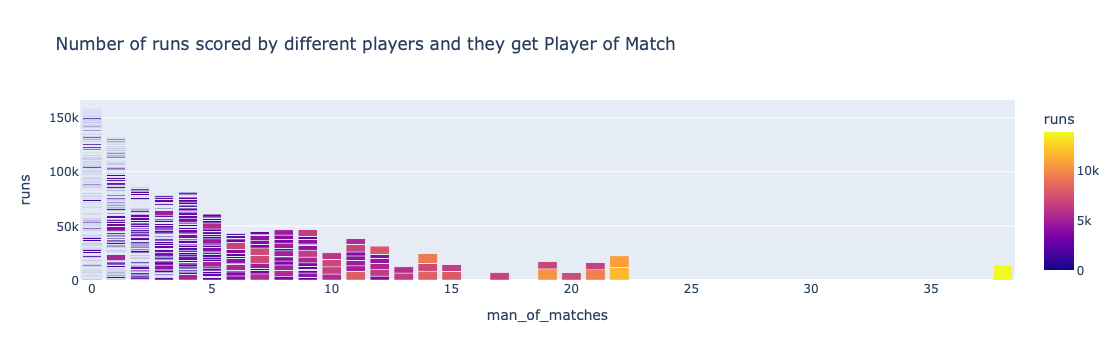

In [49]:
# create a bar plot to see the Number of runs scored by different players and they get Player of Match
fig = px.bar(final_df, x='man_of_matches', y='runs', title='Number of runs scored by different players and they get Player of Match',hover_name=final_df.index,color='runs')
# show the plot
fig.show()

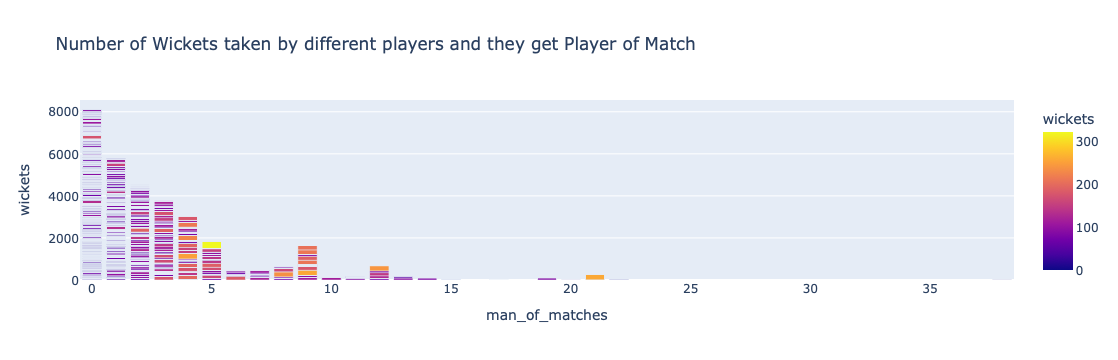

In [50]:
fig = px.bar(final_df, x='man_of_matches', y='wickets', title='Number of Wickets taken by different players and they get Player of Match',hover_name=final_df.index,color='wickets')
# show the plot
fig.show()

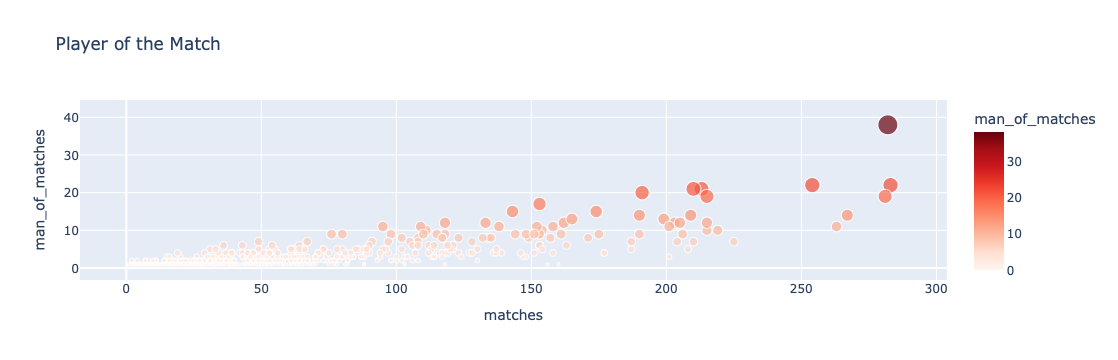

In [51]:
fig = px.scatter(final_df, x='matches', y='man_of_matches', color='man_of_matches',
                 size='man_of_matches', hover_name=final_df.index, title='Player of the Match')

# Update the color scale
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

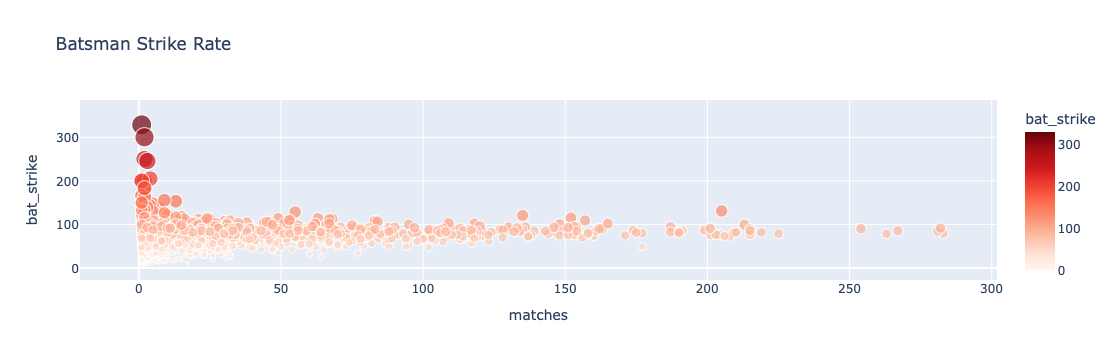

In [52]:
fig = px.scatter(final_df, x='matches', y='bat_strike',color='bat_strike',
                 size='bat_strike', hover_name=final_df.index, title='Batsman Strike Rate')
fig.update_layout(coloraxis=dict(colorscale='reds'))


fig.show()

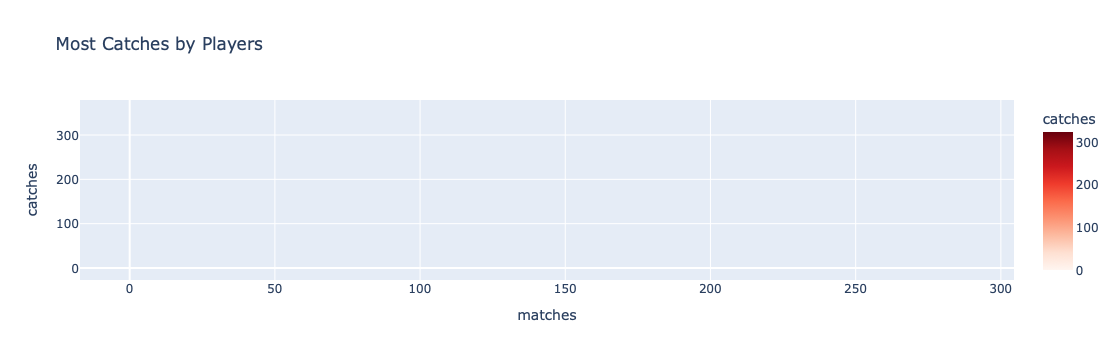

In [53]:
# Create the scatter plot to see the Which Player got most Catches
fig = px.scatter(final_df, x='matches', y='catches',color='catches',
                 size='catches', hover_name=final_df.index, title='Most Catches by Players')
fig.update_layout(coloraxis=dict(colorscale='reds'))

# Show the plot
fig.show()

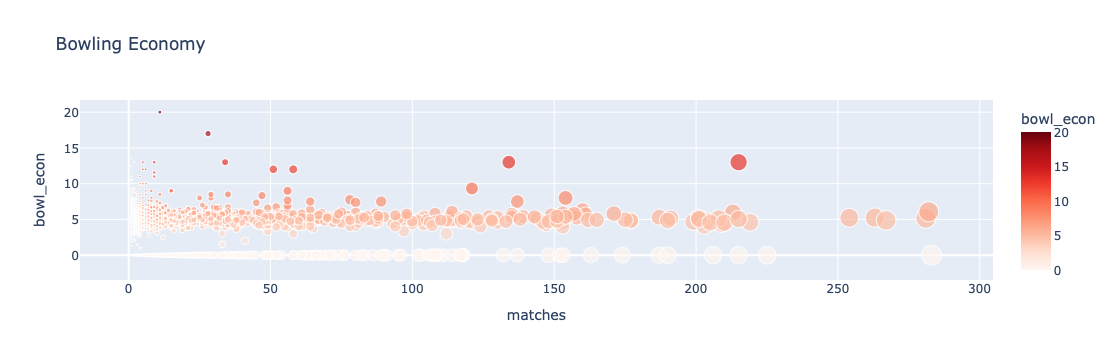

In [54]:
fig = px.scatter(final_df, x='matches', y='bowl_econ',color='bowl_econ',
                 size='matches', hover_name=final_df.index, title='Bowling Economy')
fig.update_layout(coloraxis=dict(colorscale='reds'))
fig.show()

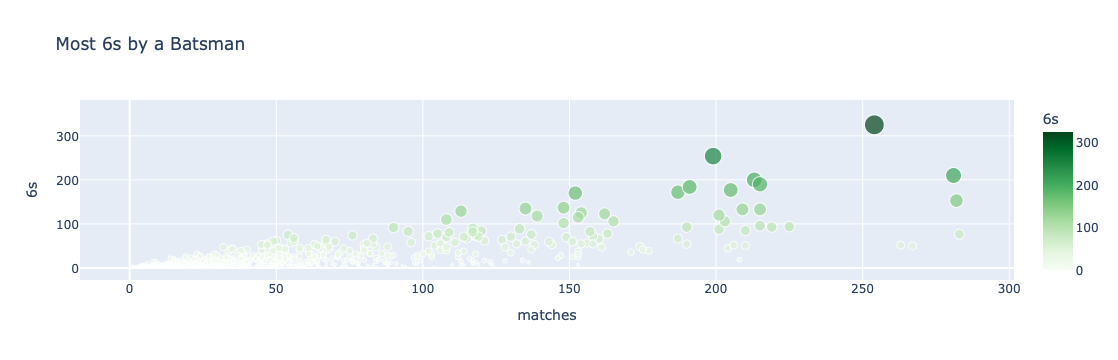

In [55]:
fig = px.scatter(final_df, x='matches', y='6s',color='6s',
                 size='6s', hover_name=final_df.index, title='Most 6s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='greens'))

# Show the plot
fig.show()

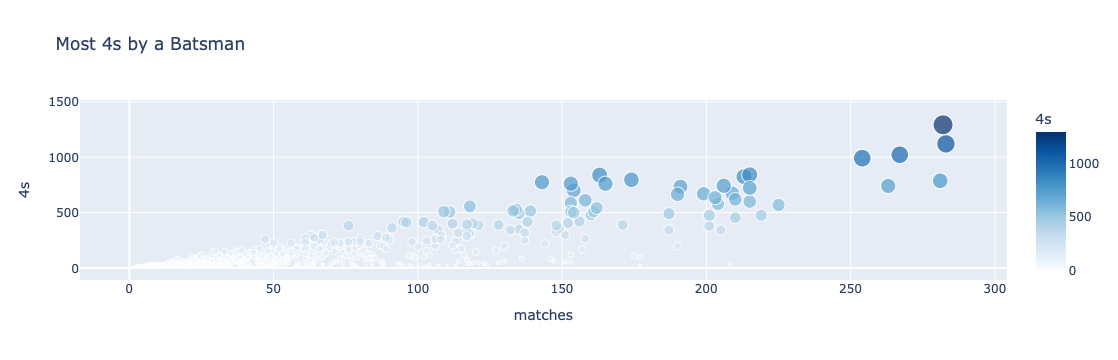

In [56]:
# Create the scatter plot to see the Most 4s by a Batsman
fig = px.scatter(final_df, x='matches', y='4s',color='4s',
                 size='4s', hover_name=final_df.index, title='Most 4s by a Batsman')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

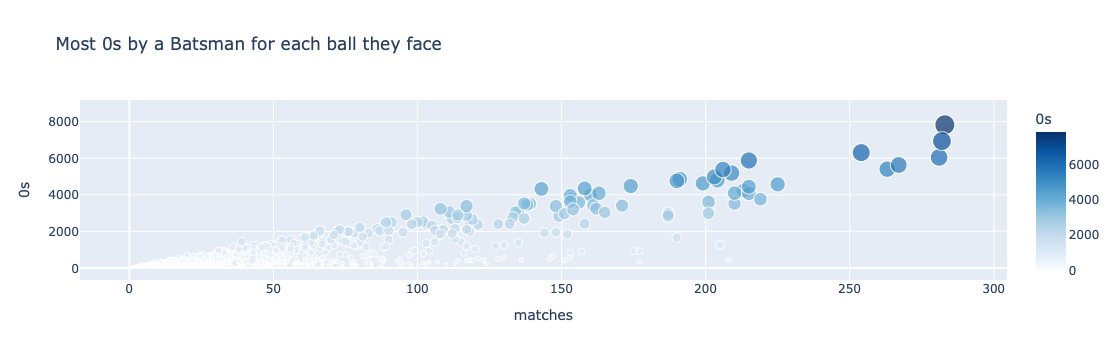

In [57]:
fig = px.scatter(final_df, x='matches', y='0s',color='0s',
                 size='0s', hover_name=final_df.index, title='Most 0s by a Batsman for each ball they face')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

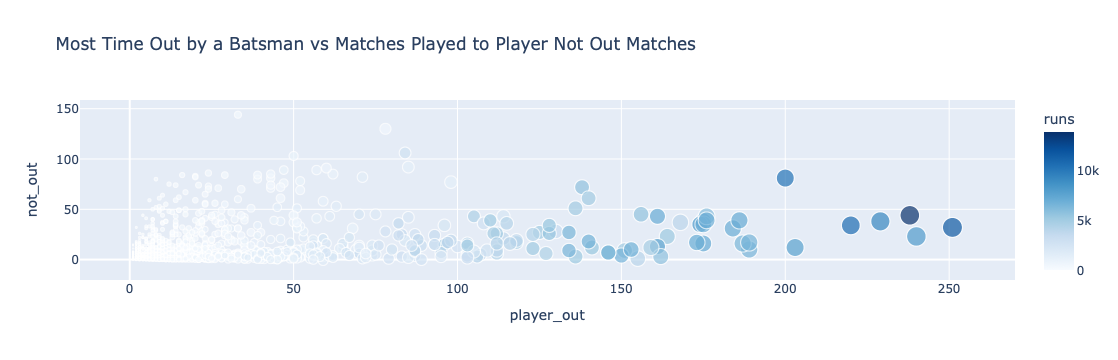

In [58]:
final_df['not_out'] = final_df['matches'] - final_df['player_out']

# Create the scatter plot to see the Most Time Out by a Batsman
fig = px.scatter(final_df, x='player_out', y='not_out', color='runs',
                 size='player_out', hover_name=final_df.index, 
                 title='Most Time Out by a Batsman vs Matches Played to Player Not Out Matches')
fig.update_layout(coloraxis=dict(colorscale='blues'))

# Show the plot
fig.show()

In [59]:
final_df = final_df[final_df['matches']>50]
final_df.head()

matches  Balls_Faced  innings    runs      0s      1s     2s  \
A Balbirnie     78.0       3285.0      2.0  2438.0  1909.0   934.0  148.0   
A Flintoff      80.0       2366.0      2.0  2096.0  1310.0   651.0  137.0   
A Nehra         79.0        174.0      2.0    90.0   125.0    34.0    4.0   
A Nel           58.0        159.0      2.0   123.0    95.0    45.0    2.0   
A Symonds      118.0       4047.0      2.0  3589.0  2082.0  1273.0  285.0   

               3s     4s    6s  ...  bat_strike  BallsThrow  wickets  overs  \
A Balbirnie  26.0  239.0  29.0  ...       74.22        24.0      1.0    4.0   
A Flintoff    9.0  205.0  54.0  ...       88.59      3784.0    116.0  631.0   
A Nehra       0.0    9.0   2.0  ...       51.72      3745.0    105.0  624.0   
A Nel         0.0   14.0   3.0  ...       77.36      2941.0     84.0  490.0   
A Symonds    29.0  304.0  73.0  ...       88.68      3476.0     69.0  579.0   

             runs_conceded  bowl_econ  bowl_strike_rate  catches  \
A Balbirnie           31.0       7.75             24.00     28.0   
A Flintoff          2571.0       4.07             32.62     25.0   
A Nehra             3279.0       5.25             35.67     11.0   
A Nel               2200.0       4.49             35.01     13.0   
A Symonds           2894.0       5.00             50.38     54.0   

             man_of_matches  not_out  
A Balbirnie             3.0      4.0  
A Flintoff              9.0     21.0  
A Nehra                 2.0     59.0  
A Nel                   2.0     49.0  
A Symonds              12.0     36.0  

[5 rows x 22 columns]

In [60]:
import plotly.graph_objects as go

In [61]:
df_top10 = final_df.sort_values('bat_average', ascending=False).head(10)
df_top10

matches  Balls_Faced  innings     runs      0s      1s  \
V Kohli              282.0      15031.0      2.0  13784.0  6933.0  5673.0   
Babar Azam           111.0       6300.0      2.0   5511.0  3067.0  2248.0   
AB de Villiers       213.0       9488.0      2.0   9435.0  4225.0  3619.0   
MS Dhoni             281.0      12090.0      2.0  10274.0  6040.0  4305.0   
IJL Trott             65.0       3732.0      2.0   2819.0  1857.0  1405.0   
KL Rahul              70.0       3197.0      2.0   2761.0  1548.0  1229.0   
Fakhar Zaman          76.0       3721.0      2.0   3434.0  2009.0  1073.0   
HM Amla              174.0       9058.0      2.0   7834.0  4477.0  3197.0   
RG Sharma            254.0      11782.0      2.0  10646.0  6303.0  3647.0   
HE van der Dussen     58.0       2707.0      2.0   2322.0  1312.0  1011.0   

                      2s    3s      4s     6s  ...  bat_strike  BallsThrow  \
V Kohli            917.0  62.0  1292.0  153.0  ...       91.70       671.0   
Babar Azam         373.0  48.0   505.0   58.0  ...       87.48         0.0   
AB de Villiers     545.0  72.0   825.0  200.0  ...       99.44       201.0   
MS Dhoni           683.0  65.0   787.0  210.0  ...       84.98        38.0   
IJL Trott          221.0  30.0   216.0    3.0  ...       75.54       185.0   
KL Rahul           127.0  14.0   219.0   60.0  ...       86.36         0.0   
Fakhar Zaman       161.0  21.0   383.0   74.0  ...       92.29       135.0   
HM Amla            466.0  69.0   796.0   49.0  ...       86.49         0.0   
RG Sharma          469.0  44.0   991.0  325.0  ...       90.36       614.0   
HE van der Dussen  144.0  18.0   181.0   40.0  ...       85.78         6.0   

                   wickets  overs  runs_conceded  bowl_econ  bowl_strike_rate  \
V Kohli                5.0  112.0          680.0       6.07            134.20   
Babar Azam             0.0    0.0            0.0       0.00              0.00   
AB de Villiers         7.0   34.0          202.0       5.94             28.71   
MS Dhoni               1.0    6.0           31.0       5.17             38.00   
IJL Trott              2.0   31.0          166.0       5.35             92.50   
KL Rahul               0.0    0.0            0.0       0.00              0.00   
Fakhar Zaman           1.0   22.0          111.0       5.05            135.00   
HM Amla                0.0    0.0            0.0       0.00              0.00   
RG Sharma              9.0  102.0          533.0       5.23             68.22   
HE van der Dussen      1.0    1.0            3.0       3.00              6.00   

                   catches  man_of_matches  not_out  
V Kohli              149.0            38.0     44.0  
Babar Azam            50.0            10.0     15.0  
AB de Villiers       174.0            21.0     38.0  
MS Dhoni             308.0            19.0     81.0  
IJL Trott             14.0             1.0     10.0  
KL Rahul              63.0             2.0     14.0  
Fakhar Zaman          40.0             9.0      6.0  
HM Amla               86.0            15.0     13.0  
RG Sharma             96.0            22.0     34.0  
HE van der Dussen     24.0             3.0     10.0  

[10 rows x 22 columns]

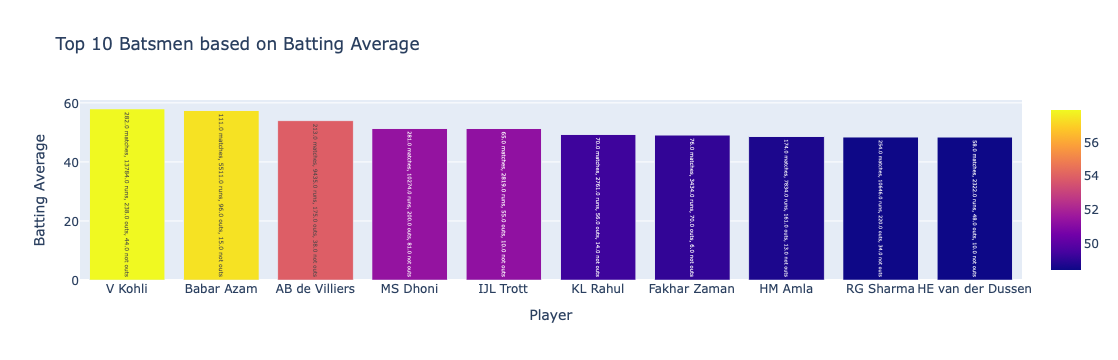

In [62]:
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['bat_average'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['runs'].astype(str) + ' runs, ' + df_top10['player_out'].astype(str) + ' outs, ' + df_top10['not_out'].astype(str) + ' not outs',
    textposition='auto',
    marker=dict(color=df_top10['bat_average'], coloraxis="coloraxis")
)])

fig.update_layout(title='Top 10 Batsmen based on Batting Average', xaxis_title="Player", yaxis_title="Batting Average")
fig.show()

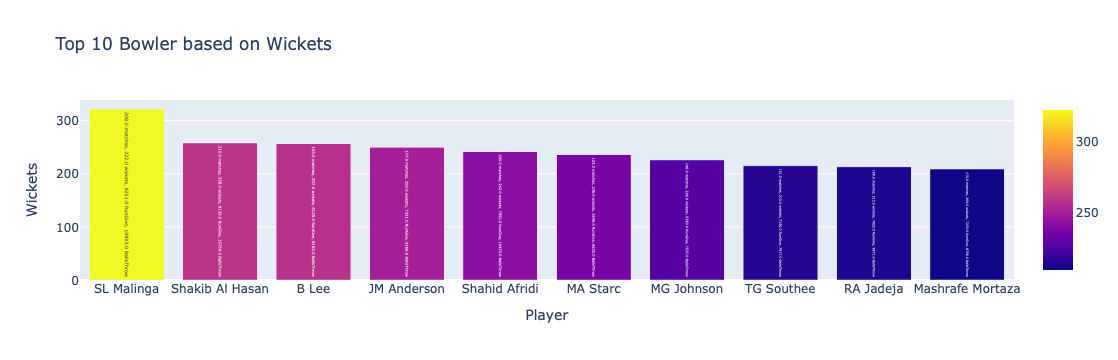

In [63]:
import plotly.graph_objects as go

df_top10 = final_df.sort_values('wickets', ascending=False).head(10)


# Create the plot using Plotly
fig = go.Figure(data=[go.Bar(
    x=df_top10.index, y=df_top10['wickets'],
    text=df_top10['matches'].astype(str) + ' matches, ' + df_top10['wickets'].astype(str) + ' wickets, ' + df_top10['runs_conceded'].astype(str) + ' RunGive, ' + df_top10['BallsThrow'].astype(str) + ' BallsThrow',
    textposition='auto',
    marker=dict(color=df_top10['wickets'], coloraxis="coloraxis")
)])
fig.update_layout(title='Top 10 Bowler based on Wickets', xaxis_title="Player", yaxis_title="Wickets")
fig.show()

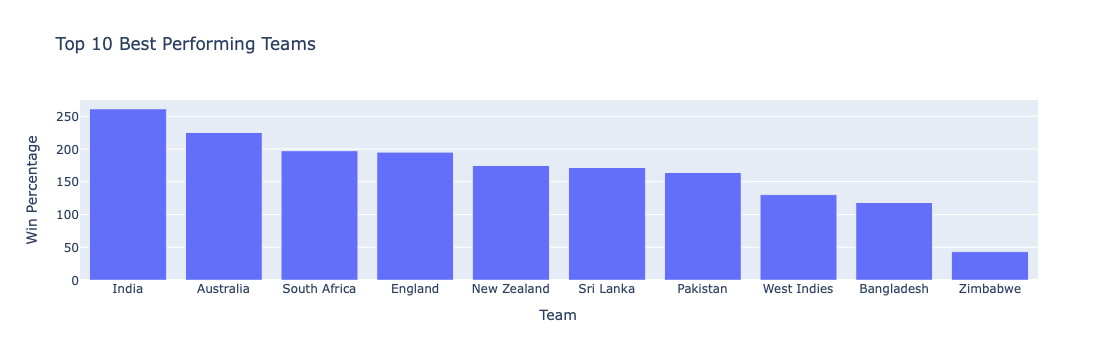

In [64]:
wins = df_matches["winner"].value_counts()

win_percentages = wins.sort_values(ascending=False)

# Plot the results
import plotly.graph_objs as go

fig = go.Figure()
fig.add_trace(go.Bar(x=wins.index[:10], y=wins.values[:10], name="Win Percentage"))
fig.update_layout(title="Top 10 Best Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

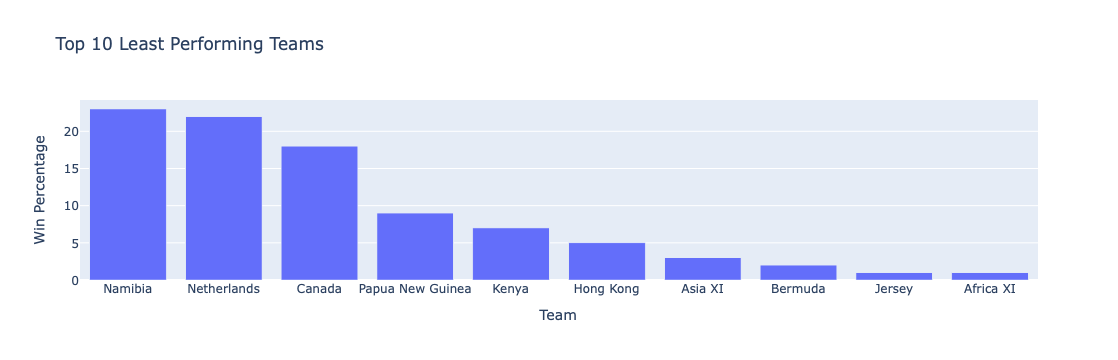

In [65]:
fig = go.Figure()
fig.add_trace(go.Bar(x=win_percentages.index[-10:], y=win_percentages.values[-10:], name="Win Percentage"))
fig.update_layout(title="Top 10 Least Performing Teams", xaxis_title="Team", yaxis_title="Win Percentage")
fig.show()

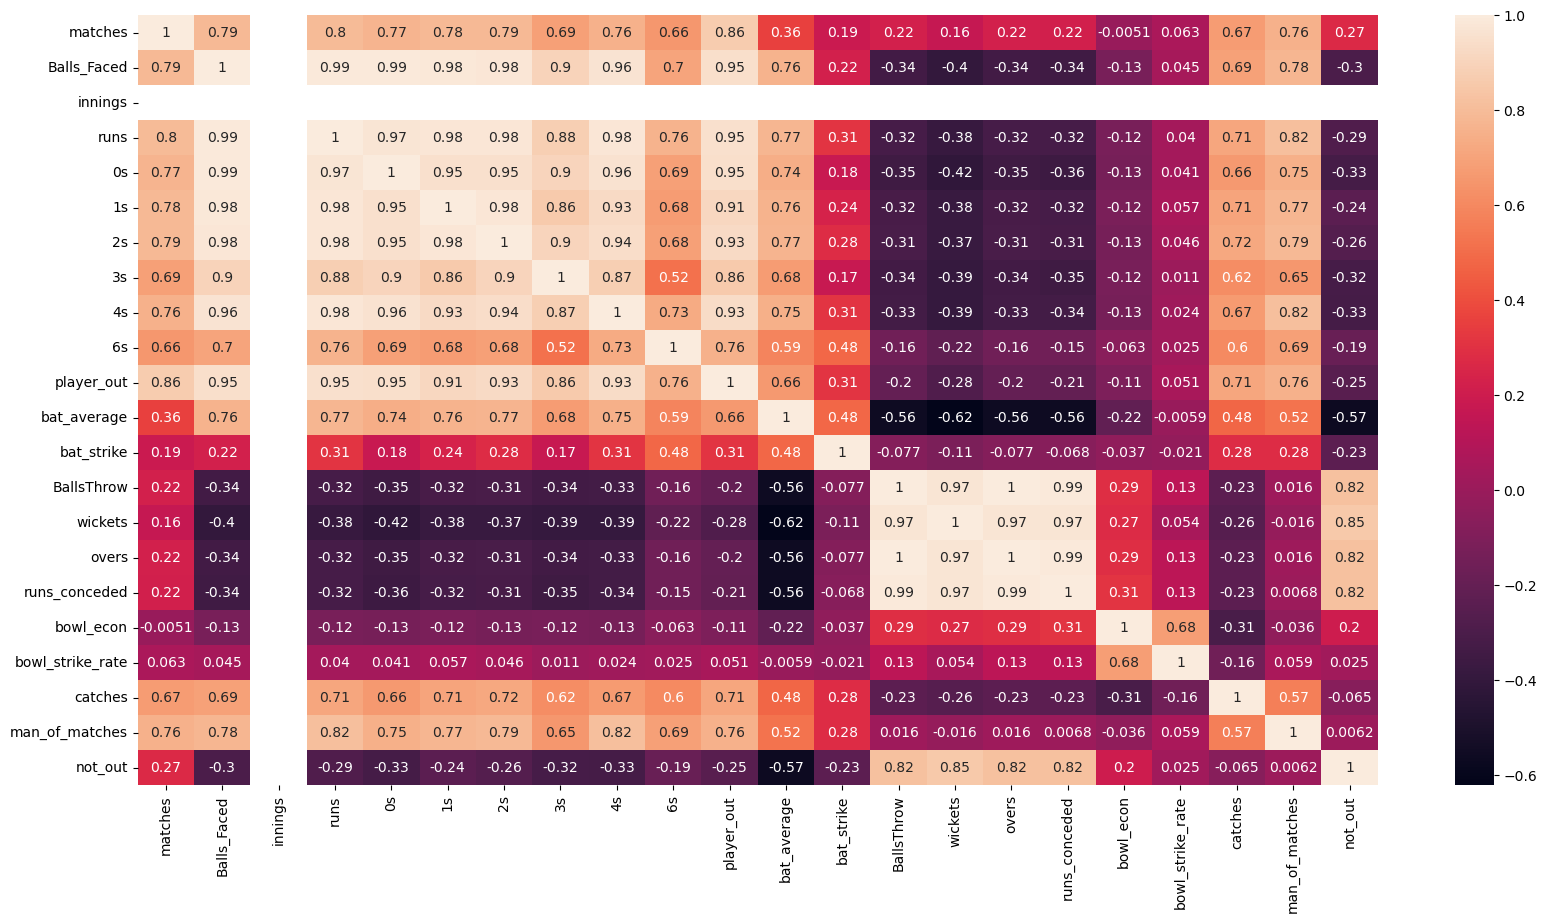

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Create the heatmap
plt.figure(figsize=(20, 10))
sns.heatmap(final_df.corr(), annot=True)
plt.show()

In [67]:
import numpy as np
def correlation(data, threshold):
    # Select only numeric columns
    numeric_data = data.select_dtypes(include=np.number)
    
    # Compute correlation matrix
    corr_matrix = numeric_data.corr()
    
    # Find correlations above threshold
    upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    col_corr = [col for col in upper_triangle.columns if any(upper_triangle[col] > threshold)]
    
    return col_corr

# Call the correlation function
corr_cols = correlation(final_df, 0.85)
print(corr_cols)

['runs', '0s', '1s', '2s', '3s', '4s', 'player_out', 'wickets', 'overs', 'runs_conceded', 'not_out']


In [68]:
import warnings
warnings.filterwarnings("ignore")
pd.set_option('display.max_columns',None)

In [69]:
df_balls['match_id'] = df_balls['match_id'].astype(str)

df_balls['runs_total'] = pd.to_numeric(df_balls['runs_total'], errors='coerce')

df_balls['runs_total'] = df_balls['runs_total'].fillna(0)

inningScores = df_balls.groupby(['match_id', 'innings'], as_index=False)['runs_total'].sum()

inningScores = inningScores[inningScores['innings']==1]
inningScores.head(10)

match_id  innings  runs_total
0   1000887        1         268
2   1000889        1         220
4   1000891        1         263
6   1000893        1         353
8   1000895        1         369
10  1001371        1         324
12  1001373        1         378
14  1001375        1         264
16  1004283        1         153
18  1004285        1         266

In [70]:
inningScores['target'] = inningScores['runs_total'] + 1
inningScores.head(10)

match_id  innings  runs_total  target
0   1000887        1         268     269
2   1000889        1         220     221
4   1000891        1         263     264
6   1000893        1         353     354
8   1000895        1         369     370
10  1001371        1         324     325
12  1001373        1         378     379
14  1001375        1         264     265
16  1004283        1         153     154
18  1004285        1         266     267

In [71]:
df_matches = df_matches.merge(inningScores[['match_id','target']], on='match_id')

In [72]:
teams = [
    'Afghanistan', 'Australia', 'Bangladesh', 'England', 'India', 'New Zealand', 
    'Pakistan', 'South Africa', 'Sri Lanka', 'West Indies', 'Zimbabwe'
]

In [73]:
df_matches['team1'].unique()

array(['India', 'Australia', 'United Arab Emirates', 'Papua New Guinea',
       'South Africa', 'Namibia', 'Pakistan', 'Bangladesh', 'Netherlands',
       'England', 'Bermuda', 'Nepal', 'Ireland', 'New Zealand', 'Oman',
       'Hong Kong', 'Canada', 'Scotland', 'Sri Lanka', 'Africa XI',
       'United States of America', 'West Indies', 'Jersey', 'Kenya'],
      dtype=object)

In [74]:
df_matches = df_matches[df_matches['team1'].isin(teams)]
df_matches = df_matches[df_matches['team2'].isin(teams)]
df_matches = df_matches[df_matches['winner'].isin(teams)]

In [75]:
df_matches['team1'].unique()

array(['India', 'Australia', 'South Africa', 'Pakistan', 'England',
       'Bangladesh', 'New Zealand', 'Sri Lanka', 'West Indies'],
      dtype=object)

In [76]:
df_matches.isnull().sum()

match_id              0
city                  0
date                  0
player_of_match       0
venue                 0
match_type            0
team1                 0
team2                 0
toss_winner           0
toss_decision         0
winner                0
result                0
result_margin         0
result_margin_type    0
umpire1               0
umpire2               0
season                0
team_type             0
team1_players         0
team2_players         0
target                0
dtype: int64

In [77]:
matches = df_matches[['match_id','city','team1','team2','winner','target']].dropna()
matches.head()

match_id          city         team1         team2        winner  target
0  1387601      Gqeberha         India  South Africa  South Africa     212
1   467883      Guwahati         India   New Zealand         India     277
2   351689         Perth     Australia   New Zealand   New Zealand     182
4   647251        Jaipur     Australia         India         India     360
6  1144147  Bloemfontein  South Africa      Zimbabwe  South Africa     199

In [78]:
balls = df_balls[df_balls['team'].isin(teams)]
balls.head()

match_id  innings   team  over  ball_number       batter    bowler  \
0  1387601        1  India     0            1   RD Gaikwad  N Burger   
1  1387601        1  India     0            2   RD Gaikwad  N Burger   
2  1387601        1  India     0            3  Tilak Varma  N Burger   
3  1387601        1  India     0            4  Tilak Varma  N Burger   
4  1387601        1  India     0            5  Tilak Varma  N Burger   

       non_striker  runs_batter  runs_extras  runs_total extra_type  \
0  B Sai Sudharsan            4            0           4          0   
1  B Sai Sudharsan            0            0           0          0   
2  B Sai Sudharsan            0            0           0          0   
3  B Sai Sudharsan            0            0           0          0   
4  B Sai Sudharsan            0            0           0          0   

   isWicketDelivery  player_out kind fielders_involved  extra_wides  \
0             False           0    0                 0          0.0   
1              True  RD Gaikwad  lbw                            0.0   
2             False           0    0                 0          0.0   
3             False           0    0                 0          0.0   
4             False           0    0                 0          0.0   

   extra_noballs  extra_byes  extra_legbyes  extra_penalty  
0            0.0         0.0            0.0            0.0  
1            0.0         0.0            0.0            0.0  
2            0.0         0.0            0.0            0.0  
3            0.0         0.0            0.0            0.0  
4            0.0         0.0            0.0            0.0

In [79]:
balls.shape

(1046382, 21)

In [80]:
final = matches.merge(balls, on='match_id')
final.head()

match_id      city  team1         team2        winner  target  innings  \
0  1387601  Gqeberha  India  South Africa  South Africa     212        1   
1  1387601  Gqeberha  India  South Africa  South Africa     212        1   
2  1387601  Gqeberha  India  South Africa  South Africa     212        1   
3  1387601  Gqeberha  India  South Africa  South Africa     212        1   
4  1387601  Gqeberha  India  South Africa  South Africa     212        1   

    team  over  ball_number       batter    bowler      non_striker  \
0  India     0            1   RD Gaikwad  N Burger  B Sai Sudharsan   
1  India     0            2   RD Gaikwad  N Burger  B Sai Sudharsan   
2  India     0            3  Tilak Varma  N Burger  B Sai Sudharsan   
3  India     0            4  Tilak Varma  N Burger  B Sai Sudharsan   
4  India     0            5  Tilak Varma  N Burger  B Sai Sudharsan   

   runs_batter  runs_extras  runs_total extra_type  isWicketDelivery  \
0            4            0           4          0             False   
1            0            0           0          0              True   
2            0            0           0          0             False   
3            0            0           0          0             False   
4            0            0           0          0             False   

   player_out kind fielders_involved  extra_wides  extra_noballs  extra_byes  \
0           0    0                 0          0.0            0.0         0.0   
1  RD Gaikwad  lbw                            0.0            0.0         0.0   
2           0    0                 0          0.0            0.0         0.0   
3           0    0                 0          0.0            0.0         0.0   
4           0    0                 0          0.0            0.0         0.0   

   extra_legbyes  extra_penalty  
0            0.0            0.0  
1            0.0            0.0  
2            0.0            0.0  
3            0.0            0.0  
4            0.0            0.0

In [81]:
final.shape

(821711, 26)

In [82]:
final = final[final['innings']==2]
final.head()

match_id      city  team1         team2        winner  target  innings  \
289  1387601  Gqeberha  India  South Africa  South Africa     212        2   
290  1387601  Gqeberha  India  South Africa  South Africa     212        2   
291  1387601  Gqeberha  India  South Africa  South Africa     212        2   
292  1387601  Gqeberha  India  South Africa  South Africa     212        2   
293  1387601  Gqeberha  India  South Africa  South Africa     212        2   

             team  over  ball_number        batter        bowler  \
289  South Africa     0            1  RR Hendricks  Mukesh Kumar   
290  South Africa     0            2  RR Hendricks  Mukesh Kumar   
291  South Africa     0            3    T de Zorzi  Mukesh Kumar   
292  South Africa     0            4    T de Zorzi  Mukesh Kumar   
293  South Africa     0            5    T de Zorzi  Mukesh Kumar   

      non_striker  runs_batter  runs_extras  runs_total extra_type  \
289    T de Zorzi            0            0           0          0   
290    T de Zorzi            1            0           1          0   
291  RR Hendricks            0            0           0          0   
292  RR Hendricks            4            0           4          0   
293  RR Hendricks            0            0           0          0   

     isWicketDelivery player_out kind fielders_involved  extra_wides  \
289             False          0    0                 0          0.0   
290             False          0    0                 0          0.0   
291             False          0    0                 0          0.0   
292             False          0    0                 0          0.0   
293             False          0    0                 0          0.0   

     extra_noballs  extra_byes  extra_legbyes  extra_penalty  
289            0.0         0.0            0.0            0.0  
290            0.0         0.0            0.0            0.0  
291            0.0         0.0            0.0            0.0  
292            0.0         0.0            0.0            0.0  
293            0.0         0.0            0.0            0.0

In [83]:
final['current_score'] = final.groupby('match_id')['runs_total'].cumsum()
final.head()

match_id      city  team1         team2        winner  target  innings  \
289  1387601  Gqeberha  India  South Africa  South Africa     212        2   
290  1387601  Gqeberha  India  South Africa  South Africa     212        2   
291  1387601  Gqeberha  India  South Africa  South Africa     212        2   
292  1387601  Gqeberha  India  South Africa  South Africa     212        2   
293  1387601  Gqeberha  India  South Africa  South Africa     212        2   

             team  over  ball_number        batter        bowler  \
289  South Africa     0            1  RR Hendricks  Mukesh Kumar   
290  South Africa     0            2  RR Hendricks  Mukesh Kumar   
291  South Africa     0            3    T de Zorzi  Mukesh Kumar   
292  South Africa     0            4    T de Zorzi  Mukesh Kumar   
293  South Africa     0            5    T de Zorzi  Mukesh Kumar   

      non_striker  runs_batter  runs_extras  runs_total extra_type  \
289    T de Zorzi            0            0           0          0   
290    T de Zorzi            1            0           1          0   
291  RR Hendricks            0            0           0          0   
292  RR Hendricks            4            0           4          0   
293  RR Hendricks            0            0           0          0   

     isWicketDelivery player_out kind fielders_involved  extra_wides  \
289             False          0    0                 0          0.0   
290             False          0    0                 0          0.0   
291             False          0    0                 0          0.0   
292             False          0    0                 0          0.0   
293             False          0    0                 0          0.0   

     extra_noballs  extra_byes  extra_legbyes  extra_penalty  current_score  
289            0.0         0.0            0.0            0.0              0  
290            0.0         0.0            0.0            0.0              1  
291            0.0         0.0            0.0            0.0              1  
292            0.0         0.0            0.0            0.0              5  
293            0.0         0.0            0.0            0.0              5

In [84]:
final['runs_left'] = np.where(final['target']-final['current_score']>=0, final['target']-final['current_score'], 0)
final.head()

match_id      city  team1         team2        winner  target  innings  \
289  1387601  Gqeberha  India  South Africa  South Africa     212        2   
290  1387601  Gqeberha  India  South Africa  South Africa     212        2   
291  1387601  Gqeberha  India  South Africa  South Africa     212        2   
292  1387601  Gqeberha  India  South Africa  South Africa     212        2   
293  1387601  Gqeberha  India  South Africa  South Africa     212        2   

             team  over  ball_number        batter        bowler  \
289  South Africa     0            1  RR Hendricks  Mukesh Kumar   
290  South Africa     0            2  RR Hendricks  Mukesh Kumar   
291  South Africa     0            3    T de Zorzi  Mukesh Kumar   
292  South Africa     0            4    T de Zorzi  Mukesh Kumar   
293  South Africa     0            5    T de Zorzi  Mukesh Kumar   

      non_striker  runs_batter  runs_extras  runs_total extra_type  \
289    T de Zorzi            0            0           0          0   
290    T de Zorzi            1            0           1          0   
291  RR Hendricks            0            0           0          0   
292  RR Hendricks            4            0           4          0   
293  RR Hendricks            0            0           0          0   

     isWicketDelivery player_out kind fielders_involved  extra_wides  \
289             False          0    0                 0          0.0   
290             False          0    0                 0          0.0   
291             False          0    0                 0          0.0   
292             False          0    0                 0          0.0   
293             False          0    0                 0          0.0   

     extra_noballs  extra_byes  extra_legbyes  extra_penalty  current_score  \
289            0.0         0.0            0.0            0.0              0   
290            0.0         0.0            0.0            0.0              1   
291            0.0         0.0            0.0            0.0              1   
292            0.0         0.0            0.0            0.0              5   
293            0.0         0.0            0.0            0.0              5   

     runs_left  
289        212  
290        211  
291        211  
292        207  
293        207

In [85]:
final["is_legal_delivery"] = final["extra_type"] == 0

# Step 2: Calculate cumulative legal deliveries bowled so far
# Group by match_id and innings, and calculate cumulative legal deliveries
final["legal_balls_bowled"] = final.groupby(["match_id", "innings"])["is_legal_delivery"].cumsum()

# Step 3: Calculate balls left
# Total balls in an ODI match per innings = 300
TOTAL_BALLS = 300
final["balls_left"] = TOTAL_BALLS - final["legal_balls_bowled"]
final.head(30)

match_id      city  team1         team2        winner  target  innings  \
289  1387601  Gqeberha  India  South Africa  South Africa     212        2   
290  1387601  Gqeberha  India  South Africa  South Africa     212        2   
291  1387601  Gqeberha  India  South Africa  South Africa     212        2   
292  1387601  Gqeberha  India  South Africa  South Africa     212        2   
293  1387601  Gqeberha  India  South Africa  South Africa     212        2   
294  1387601  Gqeberha  India  South Africa  South Africa     212        2   
295  1387601  Gqeberha  India  South Africa  South Africa     212        2   
296  1387601  Gqeberha  India  South Africa  South Africa     212        2   
297  1387601  Gqeberha  India  South Africa  South Africa     212        2   
298  1387601  Gqeberha  India  South Africa  South Africa     212        2   
299  1387601  Gqeberha  India  South Africa  South Africa     212        2   
300  1387601  Gqeberha  India  South Africa  South Africa     212        2   
301  1387601  Gqeberha  India  South Africa  South Africa     212        2   
302  1387601  Gqeberha  India  South Africa  South Africa     212        2   
303  1387601  Gqeberha  India  South Africa  South Africa     212        2   
304  1387601  Gqeberha  India  South Africa  South Africa     212        2   
305  1387601  Gqeberha  India  South Africa  South Africa     212        2   
306  1387601  Gqeberha  India  South Africa  South Africa     212        2   
307  1387601  Gqeberha  India  South Africa  South Africa     212        2   
308  1387601  Gqeberha  India  South Africa  South Africa     212        2   
309  1387601  Gqeberha  India  South Africa  South Africa     212        2   
310  1387601  Gqeberha  India  South Africa  South Africa     212        2   
311  1387601  Gqeberha  India  South Africa  South Africa     212        2   
312  1387601  Gqeberha  India  South Africa  South Africa     212        2   
313  1387601  Gqeberha  India  South Africa  South Africa     212        2   
314  1387601  Gqeberha  India  South Africa  South Africa     212        2   
315  1387601  Gqeberha  India  South Africa  South Africa     212        2   
316  1387601  Gqeberha  India  South Africa  South Africa     212        2   
317  1387601  Gqeberha  India  South Africa  South Africa     212        2   
318  1387601  Gqeberha  India  South Africa  South Africa     212        2   

             team  over  ball_number        batter          bowler  \
289  South Africa     0            1  RR Hendricks    Mukesh Kumar   
290  South Africa     0            2  RR Hendricks    Mukesh Kumar   
291  South Africa     0            3    T de Zorzi    Mukesh Kumar   
292  South Africa     0            4    T de Zorzi    Mukesh Kumar   
293  South Africa     0            5    T de Zorzi    Mukesh Kumar   
294  South Africa     0            6    T de Zorzi    Mukesh Kumar   
295  South Africa     1            7  RR Hendricks  Arshdeep Singh   
296  South Africa     1            8    T de Zorzi  Arshdeep Singh   
297  South Africa     1            9    T de Zorzi  Arshdeep Singh   
298  South Africa     1           10    T de Zorzi  Arshdeep Singh   
299  South Africa     1           11  RR Hendricks  Arshdeep Singh   
300  South Africa     1           12  RR Hendricks  Arshdeep Singh   
301  South Africa     1           13    T de Zorzi  Arshdeep Singh   
302  South Africa     2           14  RR Hendricks    Mukesh Kumar   
303  South Africa     2           15  RR Hendricks    Mukesh Kumar   
304  South Africa     2           16  RR Hendricks    Mukesh Kumar   
305  South Africa     2           17  RR Hendricks    Mukesh Kumar   
306  South Africa     2           18  RR Hendricks    Mukesh Kumar   
307  South Africa     2           19  RR Hendricks    Mukesh Kumar   
308  South Africa     3           20    T de Zorzi  Arshdeep Singh   
309  South Africa     3           21    T de Zorzi  Arshdeep Singh   
310  South Africa     3           22    T de 

In [86]:
final['wickets_left'] = 10 - final.groupby('match_id')['isWicketDelivery'].cumsum()
final.head()

match_id      city  team1         team2        winner  target  innings  \
289  1387601  Gqeberha  India  South Africa  South Africa     212        2   
290  1387601  Gqeberha  India  South Africa  South Africa     212        2   
291  1387601  Gqeberha  India  South Africa  South Africa     212        2   
292  1387601  Gqeberha  India  South Africa  South Africa     212        2   
293  1387601  Gqeberha  India  South Africa  South Africa     212        2   

             team  over  ball_number        batter        bowler  \
289  South Africa     0            1  RR Hendricks  Mukesh Kumar   
290  South Africa     0            2  RR Hendricks  Mukesh Kumar   
291  South Africa     0            3    T de Zorzi  Mukesh Kumar   
292  South Africa     0            4    T de Zorzi  Mukesh Kumar   
293  South Africa     0            5    T de Zorzi  Mukesh Kumar   

      non_striker  runs_batter  runs_extras  runs_total extra_type  \
289    T de Zorzi            0            0           0          0   
290    T de Zorzi            1            0           1          0   
291  RR Hendricks            0            0           0          0   
292  RR Hendricks            4            0           4          0   
293  RR Hendricks            0            0           0          0   

     isWicketDelivery player_out kind fielders_involved  extra_wides  \
289             False          0    0                 0          0.0   
290             False          0    0                 0          0.0   
291             False          0    0                 0          0.0   
292             False          0    0                 0          0.0   
293             False          0    0                 0          0.0   

     extra_noballs  extra_byes  extra_legbyes  extra_penalty  current_score  \
289            0.0         0.0            0.0            0.0              0   
290            0.0         0.0            0.0            0.0              1   
291            0.0         0.0            0.0            0.0              1   
292            0.0         0.0            0.0            0.0              5   
293            0.0         0.0            0.0            0.0              5   

     runs_left  is_legal_delivery  legal_balls_bowled  balls_left  \
289        212               True                   1         299   
290        211               True                   2         298   
291        211               True                   3         297   
292        207               True                   4         296   
293        207               True                   5         295   

     wickets_left  
289            10  
290            10  
291            10  
292            10  
293            10

In [87]:
final['current_run_rate'] = np.where((300 - final['balls_left']) == 0,0, (final['current_score'] * 6) / (300 - final['balls_left']))
final['required_run_rate'] = np.where(final['balls_left']>0, final['runs_left']*6/final['balls_left'], 0)

In [88]:
def result(row):
    return 1 if row['team'] == row['winner'] else 0

In [89]:
final['result'] = final.apply(result, axis=1)
final.head()

match_id      city  team1         team2        winner  target  innings  \
289  1387601  Gqeberha  India  South Africa  South Africa     212        2   
290  1387601  Gqeberha  India  South Africa  South Africa     212        2   
291  1387601  Gqeberha  India  South Africa  South Africa     212        2   
292  1387601  Gqeberha  India  South Africa  South Africa     212        2   
293  1387601  Gqeberha  India  South Africa  South Africa     212        2   

             team  over  ball_number        batter        bowler  \
289  South Africa     0            1  RR Hendricks  Mukesh Kumar   
290  South Africa     0            2  RR Hendricks  Mukesh Kumar   
291  South Africa     0            3    T de Zorzi  Mukesh Kumar   
292  South Africa     0            4    T de Zorzi  Mukesh Kumar   
293  South Africa     0            5    T de Zorzi  Mukesh Kumar   

      non_striker  runs_batter  runs_extras  runs_total extra_type  \
289    T de Zorzi            0            0           0          0   
290    T de Zorzi            1            0           1          0   
291  RR Hendricks            0            0           0          0   
292  RR Hendricks            4            0           4          0   
293  RR Hendricks            0            0           0          0   

     isWicketDelivery player_out kind fielders_involved  extra_wides  \
289             False          0    0                 0          0.0   
290             False          0    0                 0          0.0   
291             False          0    0                 0          0.0   
292             False          0    0                 0          0.0   
293             False          0    0                 0          0.0   

     extra_noballs  extra_byes  extra_legbyes  extra_penalty  current_score  \
289            0.0         0.0            0.0            0.0              0   
290            0.0         0.0            0.0            0.0              1   
291            0.0         0.0            0.0            0.0              1   
292            0.0         0.0            0.0            0.0              5   
293            0.0         0.0            0.0            0.0              5   

     runs_left  is_legal_delivery  legal_balls_bowled  balls_left  \
289        212               True                   1         299   
290        211               True                   2         298   
291        211               True                   3         297   
292        207               True                   4         296   
293        207               True                   5         295   

     wickets_left  current_run_rate  required_run_rate  result  
289            10               0.0           4.254181       1  
290            10               3.0           4.248322       1  
291            10               2.0           4.262626       1  
292            10               7.5           4.195946       1  
293            10               6.0           4.210169       1

In [90]:
final.to_csv('final.csv')

In [91]:
final['BattingTeam'] = final['team']
final['BowlingTeam'] = final.apply(
    lambda row: row['team2'] if row['team'] == row['team1'] else row['team1'], axis=1
)

final.head()

match_id      city  team1         team2        winner  target  innings  \
289  1387601  Gqeberha  India  South Africa  South Africa     212        2   
290  1387601  Gqeberha  India  South Africa  South Africa     212        2   
291  1387601  Gqeberha  India  South Africa  South Africa     212        2   
292  1387601  Gqeberha  India  South Africa  South Africa     212        2   
293  1387601  Gqeberha  India  South Africa  South Africa     212        2   

             team  over  ball_number        batter        bowler  \
289  South Africa     0            1  RR Hendricks  Mukesh Kumar   
290  South Africa     0            2  RR Hendricks  Mukesh Kumar   
291  South Africa     0            3    T de Zorzi  Mukesh Kumar   
292  South Africa     0            4    T de Zorzi  Mukesh Kumar   
293  South Africa     0            5    T de Zorzi  Mukesh Kumar   

      non_striker  runs_batter  runs_extras  runs_total extra_type  \
289    T de Zorzi            0            0           0          0   
290    T de Zorzi            1            0           1          0   
291  RR Hendricks            0            0           0          0   
292  RR Hendricks            4            0           4          0   
293  RR Hendricks            0            0           0          0   

     isWicketDelivery player_out kind fielders_involved  extra_wides  \
289             False          0    0                 0          0.0   
290             False          0    0                 0          0.0   
291             False          0    0                 0          0.0   
292             False          0    0                 0          0.0   
293             False          0    0                 0          0.0   

     extra_noballs  extra_byes  extra_legbyes  extra_penalty  current_score  \
289            0.0         0.0            0.0            0.0              0   
290            0.0         0.0            0.0            0.0              1   
291            0.0         0.0            0.0            0.0              1   
292            0.0         0.0            0.0            0.0              5   
293            0.0         0.0            0.0            0.0              5   

     runs_left  is_legal_delivery  legal_balls_bowled  balls_left  \
289        212               True                   1         299   
290        211               True                   2         298   
291        211               True                   3         297   
292        207               True                   4         296   
293        207               True                   5         295   

     wickets_left  current_run_rate  required_run_rate  result   BattingTeam  \
289            10               0.0           4.254181       1  South Africa   
290            10               3.0           4.248322       1  South Africa   
291            10               2.0           4.262626       1  South Africa   
292            10               7.5           4.195946       1  South Africa   
293            10               6.0           4.210169       1  South Africa   

    BowlingTeam  
289       India  
290       India  
291       India  
292       India  
293       India

In [92]:
winningPred = final[['BattingTeam', 'BowlingTeam','city','runs_left','balls_left','wickets_left','current_run_rate','required_run_rate','target','result']]
winningPred.head(30)

BattingTeam BowlingTeam      city  runs_left  balls_left  wickets_left  \
289  South Africa       India  Gqeberha        212         299            10   
290  South Africa       India  Gqeberha        211         298            10   
291  South Africa       India  Gqeberha        211         297            10   
292  South Africa       India  Gqeberha        207         296            10   
293  South Africa       India  Gqeberha        207         295            10   
294  South Africa       India  Gqeberha        207         294            10   
295  South Africa       India  Gqeberha        206         293            10   
296  South Africa       India  Gqeberha        206         292            10   
297  South Africa       India  Gqeberha        206         291            10   
298  South Africa       India  Gqeberha        205         290            10   
299  South Africa       India  Gqeberha        204         290            10   
300  South Africa       India  Gqeberha        203         289            10   
301  South Africa       India  Gqeberha        203         288            10   
302  South Africa       India  Gqeberha        203         287            10   
303  South Africa       India  Gqeberha        203         286            10   
304  South Africa       India  Gqeberha        203         285            10   
305  South Africa       India  Gqeberha        203         284            10   
306  South Africa       India  Gqeberha        203         283            10   
307  South Africa       India  Gqeberha        199         282            10   
308  South Africa       India  Gqeberha        199         281            10   
309  South Africa       India  Gqeberha        199         280            10   
310  South Africa       India  Gqeberha        199         279            10   
311  South Africa       India  Gqeberha        199         278            10   
312  South Africa       India  Gqeberha        195         277            10   
313  South Africa       India  Gqeberha        195         276            10   
314  South Africa       India  Gqeberha        195         275            10   
315  South Africa       India  Gqeberha        195         274            10   
316  South Africa       India  Gqeberha        195         273            10   
317  South Africa       India  Gqeberha        195         272            10   
318  South Africa       India  Gqeberha        195         271            10   

     current_run_rate  required_run_rate  target  result  
289          0.000000           4.254181     212       1  
290          3.000000           4.248322     212       1  
291          2.000000           4.262626     212       1  
292          7.500000           4.195946     212       1  
293          6.000000           4.210169     212       1  
294          5.000000           4.224490     212       1  
295          5.142857           4.218430     212       1  
296          4.500000           4.232877     212       1  
297          4.000000           4.247423     212       1  
298          4.200000           4.241379     212       1  
299          4.800000           4.220690     212       1  
300          4.909091           4.214533     212       1  
301          4.500000           4.229167     212       1  
302          4.153846           4.243902     212       1  
303          3.857143           4.258741     212       1  
304          3.600000           4.273684     212       1  
305          3.375000           4.288732     212       1  
306          3.176471           4.303887     212       1  
307          4.333333           4.234043     212       1  
308          4.105263           4.249110     212       1  
309          3.900000           4.264286     212       1  
310          3.714286           4.279570     212       1  
311          3.545455           4.294964     212       1  
312          4.434783           4.223827     212       1  
313          4.250000           4.239130     212  

In [93]:
winningPred.sample()

BattingTeam   BowlingTeam       city  runs_left  balls_left  \
575789   Australia  South Africa  Cape Town         38          12   

        wickets_left  current_run_rate  required_run_rate  target  result  
575789             3              5.25               19.0     290       0

In [94]:
from sklearn.model_selection import train_test_split

X = winningPred.drop('result', axis=1)
y = winningPred['result']
X.shape, y.shape

((380871, 9), (380871,))

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import numpy as np
import pandas as pd

In [96]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing (example for numerical and categorical features)
numeric_features = ['runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target']
categorical_features = ['BattingTeam', 'BowlingTeam', 'city']

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing steps
trf = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

**Linear regression**

In [98]:
# Linear Regression Pipeline
lr_pipeline = Pipeline(steps=[
    ('preprocessor', trf),
    ('regressor', LinearRegression())
])

# Train the Linear Regression model
lr_pipeline.fit(X_train, y_train)

# Evaluate the Linear Regression model
y_pred_lr = lr_pipeline.predict(X_test)
mse = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse)

# Display rounded predictions for interpretability (if applicable)
y_pred_lr_rounded = np.round(y_pred_lr)
print("Rounded Linear Regression Predictions:", y_pred_lr_rounded[:10])

Linear Regression Mean Squared Error: 0.12410583631611485
Rounded Linear Regression Predictions: [-0.  0.  1.  0.  0.  1.  0. -0.  1. -0.]


In [99]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import numpy as np

# Train the Linear Regression model
lr_pipeline = Pipeline(steps=[
    ('preprocessor', trf),
    ('regressor', LinearRegression())
])
lr_pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr_pipeline.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred_lr)
print("Linear Regression Mean Squared Error:", mse)

# Convert continuous predictions to discrete values (rounded to nearest integer)
y_pred_lr_rounded = np.round(y_pred_lr)

# Calculate classification metrics
accuracy = accuracy_score(y_test, y_pred_lr_rounded) * 100
precision = precision_score(y_test, y_pred_lr_rounded, average='macro') * 100
recall = recall_score(y_test, y_pred_lr_rounded, average='macro') * 100
f1 = f1_score(y_test, y_pred_lr_rounded, average='macro') * 100

# Print results
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")

# Display some rounded predictions
print("Rounded Linear Regression Predictions (First 10):", y_pred_lr_rounded[:10])


Linear Regression Mean Squared Error: 0.12410583631611485
Accuracy: 84.69%
Precision: 33.97%
Recall: 33.88%
F1 Score: 33.92%
Rounded Linear Regression Predictions (First 10): [-0.  0.  1.  0.  0.  1.  0. -0.  1. -0.]


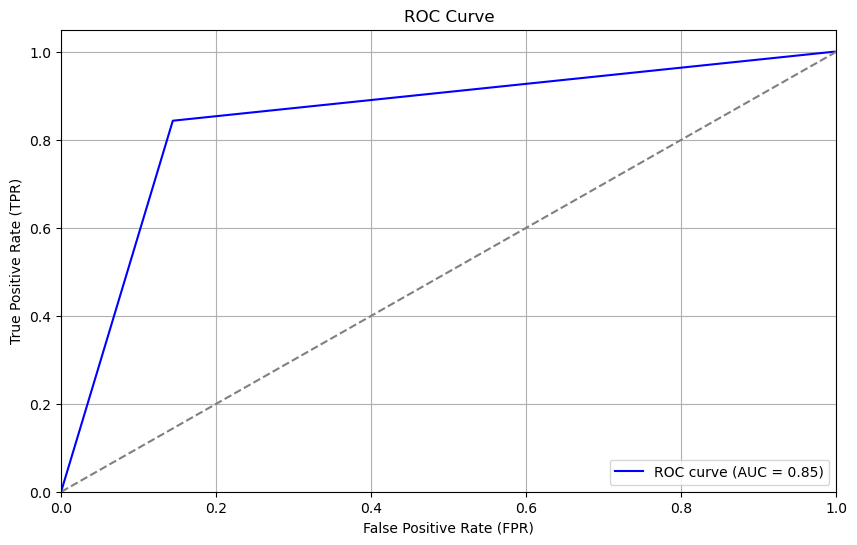

In [165]:
y_pred_binary = np.round(y_pred_lr_rounded)  # Here we are using rounded values for classification purposes

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line (random classifier)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

**Random Forest**

In [105]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Define the pipeline (preprocessor should be defined in your code)
rf_pipeline = Pipeline(steps=[
    ('preprocessor', trf),  # Assuming 'trf' is your preprocessing pipeline
    ('classifier', RandomForestClassifier(random_state=42))
])

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'classifier__n_estimators': [100],
    'classifier__max_depth': [15],
    'classifier__min_samples_split': [10],
    'classifier__min_samples_leaf': [4]
}

# Perform GridSearchCV
grid_search_rf = GridSearchCV(rf_pipeline, param_grid=param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Train the model
grid_search_rf.fit(X_train, y_train)

# Print best parameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate the model
y_pred_rf = grid_search_rf.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='binary')  # Use 'macro' or 'weighted' for multi-class
recall = recall_score(y_test, y_pred_rf, average='binary')        # Use 'macro' or 'weighted' for multi-class
f1 = f1_score(y_test, y_pred_rf, average='binary')                # Use 'macro' or 'weighted' for multi-class

# Print the results
print(f"Random Forest Accuracy: {accuracy:.4f}")
print(f"Random Forest Precision: {precision:.4f}")
print(f"Random Forest Recall: {recall:.4f}")
print(f"Random Forest F1 Score: {f1:.4f}")


Best Parameters for Random Forest: {'classifier__max_depth': 15, 'classifier__min_samples_leaf': 4, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 100}
Random Forest Accuracy: 0.9160
Random Forest Precision: 0.9227
Random Forest Recall: 0.9091
Random Forest F1 Score: 0.9159


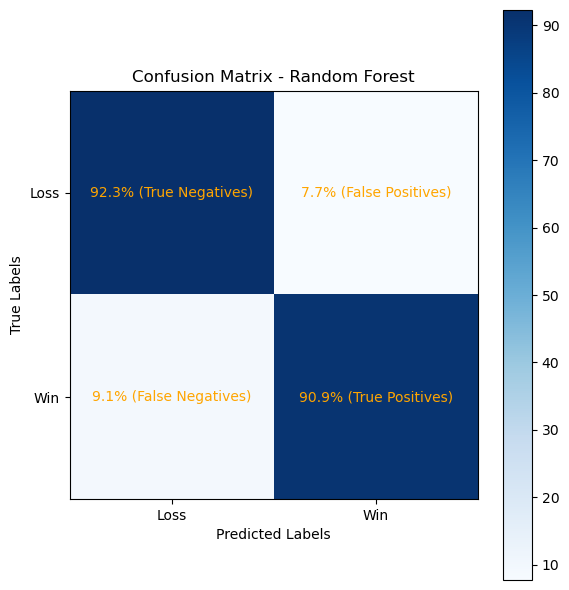

In [181]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import numpy as np

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
classes = ['Loss', 'Win']  # Replace with your actual class labels if different

# Convert counts to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix with custom annotations
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm_percentage, interpolation='nearest', cmap='Blues')
ax.set_title("Confusion Matrix - Random Forest")
plt.colorbar(im)

# Add labels, titles, and ticks
tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Annotate each cell with the percentage and its label
for i in range(cm_percentage.shape[0]):
    for j in range(cm_percentage.shape[1]):
        if i == j:
            label = "True Positives" if i == 1 else "True Negatives"
        else:
            label = "False Positives" if i < j else "False Negatives"
        
        # Display percentage with one decimal place and use yellow font for visibility
        ax.text(j, i, f"{cm_percentage[i, j]:.1f}% ({label})", ha="center", va="center", color="orange")

plt.tight_layout()
plt.show()


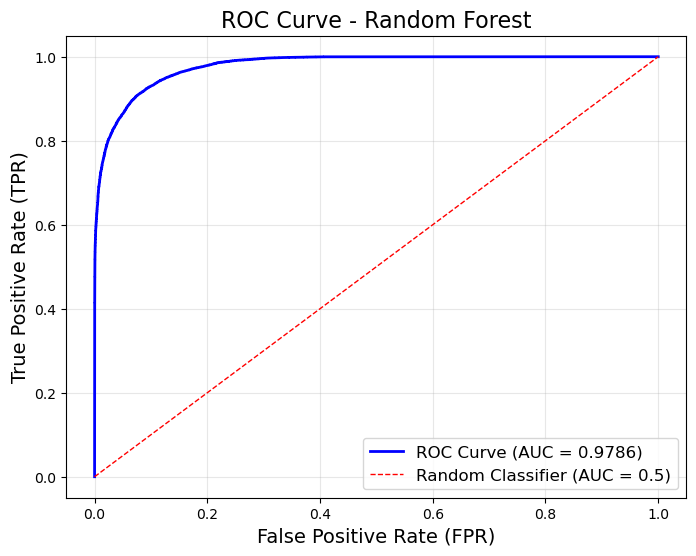

In [107]:
from sklearn.metrics import roc_curve, roc_auc_score, auc
import matplotlib.pyplot as plt

# Predict probabilities for the positive class
y_pred_prob_rf = grid_search_rf.predict_proba(X_test)[:, 1]  # Probability for the positive class (e.g., 1)

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Compute the AUC score
auc_score = roc_auc_score(y_test, y_pred_prob_rf)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {auc_score:.4f})')
plt.plot([0, 1], [0, 1], color='red', lw=1, linestyle='--', label='Random Classifier (AUC = 0.5)')

# Customize the plot
plt.title('ROC Curve - Random Forest', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=14)
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.show()


**XGB**

In [117]:
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Define features and target
X = winningPred.drop('result', axis=1)  # Features
y = winningPred['result']              # Target

# Encode the target variable (if not already binary)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# Define preprocessing for categorical and numerical features
categorical_features = ['BattingTeam', 'BowlingTeam', 'city']  # Categorical columns
numerical_features = ['runs_left', 'balls_left', 'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numerical_features),  # Keep numerical features as they are
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)  # Encode categorical features
    ]
)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost classifier
xgb_model = XGBClassifier(random_state=42, eval_metric='logloss')

# Hyperparameter grid
param_grid = {
    'n_estimators': [100],      # Number of trees
    'learning_rate': [0.1],  # Learning rate
    'max_depth': [5],           # Maximum depth of the tree
    'subsample': [0.8],       # Fraction of samples used for training
    'colsample_bytree': [0.8] # Fraction of features used for each tree
}

# Create a pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),  # Apply preprocessing
    ('classifier', xgb_model)       # Train XGBoost
])

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=pipeline,
    param_grid={'classifier__' + key: value for key, value in param_grid.items()},  # Update keys for pipeline
    scoring='accuracy',
    n_jobs=-1,
    cv=3,  # 3-fold cross-validation
    verbose=1
)

# Train the model
grid_search.fit(X_train, y_train)


# Evaluate on the test set
best_pipeline = grid_search.best_estimator_
y_pred = best_pipeline.predict(X_test)

# Print performance metrics
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 3 folds for each of 1 candidates, totalling 3 fits
Test Accuracy: 0.8907121759107318

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89     37861
           1       0.89      0.89      0.89     38314

    accuracy                           0.89     76175
   macro avg       0.89      0.89      0.89     76175
weighted avg       0.89      0.89      0.89     76175



In [135]:
# Predictions on the test set
y_pred = best_pipeline.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.8907
Precision: 0.8906
Recall: 0.8923
F1-Score: 0.8915


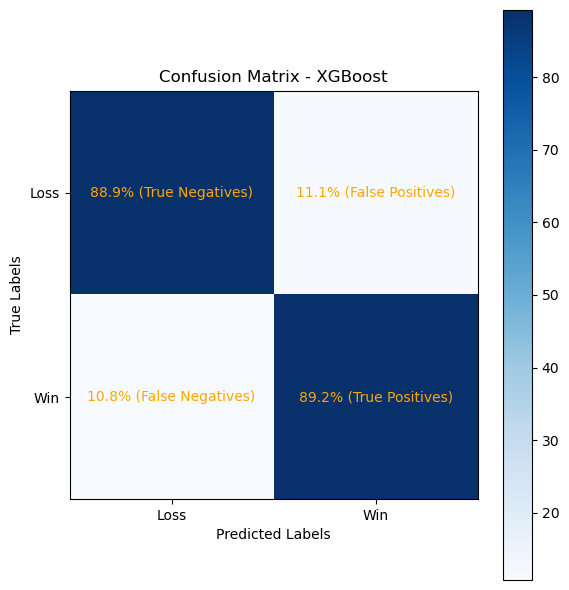

In [185]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
classes = ['Loss', 'Win']  # Replace with your actual class labels if different

# Convert counts to percentages
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

# Plot confusion matrix with custom annotations
fig, ax = plt.subplots(figsize=(6, 6))
im = ax.imshow(cm_percentage, interpolation='nearest', cmap='Blues')
ax.set_title("Confusion Matrix - XGBoost")
plt.colorbar(im)

# Add labels, titles, and ticks
tick_marks = np.arange(len(classes))
ax.set_xticks(tick_marks)
ax.set_yticks(tick_marks)
ax.set_xticklabels(classes)
ax.set_yticklabels(classes)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# Annotate each cell with the percentage and its label
for i in range(cm_percentage.shape[0]):
    for j in range(cm_percentage.shape[1]):
        if i == j:
            label = "True Positives" if i == 1 else "True Negatives"
        else:
            label = "False Positives" if i < j else "False Negatives"
        
        # Display percentage with one decimal place
        ax.text(j, i, f"{cm_percentage[i, j]:.1f}% ({label})", ha="center", va="center", color="orange")

plt.tight_layout()
plt.show()


In [143]:
q = [['India', 'South Africa', 'Durban', 120,120, 1,6, 6, 400]]
columns = ['BattingTeam', 'BowlingTeam', 'city', 'runs_left', 'balls_left',
       'wickets_left', 'current_run_rate', 'required_run_rate', 'target']

team = pd.DataFrame(q,columns=columns)

In [133]:
best_pipeline.predict_proba(team)

array([[0.845922  , 0.15407802]], dtype=float32)